# This notebook is for EDA

## This notebook will include Data Exploration and preparation, missing value imputation, outlier detection and feature engineering

### Load libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(72161, 12)

The dataset has 72161 rows and 12 columns

Lets check the columns

In [4]:
df.columns

Index(['Id', 'age', 'number_dependent_family_members', 'monthly_income',
       'number_of_credit_lines', 'real_estate_loans',
       'ratio_debt_payment_to_income', 'credit_line_utilization',
       'number_of_previous_late_payments_up_to_59_days',
       'number_of_previous_late_payments_up_to_89_days',
       'number_of_previous_late_payments_90_days_or_more',
       'defaulted_on_loan'],
      dtype='object')

In [5]:
df.head(5)

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
0,1,66.0,NaN,4000.0,NaN,1.0,0.569108,0.05488766900000001,0.0,0.0,0.0,0
1,2,61.0,2.0,4000.0,6.0,1.0,0.297176,0.10194991099999999,0.0,0.0,0.0,0
2,3,31.0,2.0,3040.0,8.0,0.0,0.160145,1.22713507,4.0,0.0,0.0,1
3,4,54.0,4.0,10218.0,5.0,0.0,0.067913,0.08327777900000001,0.0,0.0,0.0,0
4,5,29.0,0.0,4468.0,6.0,0.0,0.328261,0.317445504,0.0,0.0,0.0,0


In [6]:
df.describe()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
count,72161.000000,65017.000000,67945.000000,6.614500e+04,66007.000000,68355.000000,66553.000000,67966.000000,66316.000000,68540.000000,72161.000000
mean,36081.000000,51.388914,0.847009,6.624388e+03,8.756193,1.050296,26.524005,0.393491,0.206074,0.224059,0.069470
std,20831.230725,14.414338,1.144038,1.084630e+04,5.198769,1.114420,399.253008,3.680686,3.696260,3.634436,0.254253
min,1.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18041.000000,41.000000,0.000000,3.400000e+03,5.000000,0.000000,0.141302,0.000000,0.000000,0.000000,0.000000
50%,36081.000000,51.000000,0.000000,5.400000e+03,8.000000,1.000000,0.294673,0.000000,0.000000,0.000000,0.000000
75%,54121.000000,62.000000,2.000000,8.232000e+03,11.000000,2.000000,0.480989,0.000000,0.000000,0.000000,0.000000
max,72161.000000,103.000000,13.000000,1.560100e+06,57.000000,25.000000,61106.500000,98.000000,98.000000,98.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72161 entries, 0 to 72160
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                72161 non-null  int64  
 1   age                                               65017 non-null  float64
 2   number_dependent_family_members                   67945 non-null  float64
 3   monthly_income                                    66145 non-null  float64
 4   number_of_credit_lines                            66007 non-null  float64
 5   real_estate_loans                                 68355 non-null  float64
 6   ratio_debt_payment_to_income                      66553 non-null  float64
 7   credit_line_utilization                           65815 non-null  object 
 8   number_of_previous_late_payments_up_to_59_days    67966 non-null  float64
 9   number_of_previou

From all the columns *credit_line_utilization* is object the rest are numeric. Let's check *credit_line_utilization*

In [8]:
df['credit_line_utilization']

0        0.05488766900000001
1        0.10194991099999999
2                 1.22713507
3        0.08327777900000001
4                0.317445504
                ...         
72156            0.145213501
72157            0.445703733
72158            0.048434473
72159            0.447265776
72160     0.8737087640000001
Name: credit_line_utilization, Length: 72161, dtype: object

The column is numeric even though type is object. Lets convert it to float

In [9]:
df['credit_line_utilization'].astype(float, errors="raise")

ValueError: could not convert string to float: '1,089820359'

The error shows us that it could not convert string to float 1,089820359 

Comma in 1,089820359 is making it difficultfor us to convert it to float. So we gonna replace Comma with dot in the cell below

In [5]:
df['credit_line_utilization'] = df['credit_line_utilization'].str.replace(',', '.').astype(float)

In [6]:
df['credit_line_utilization']

0        0.054888
1        0.101950
2        1.227135
3        0.083278
4        0.317446
           ...   
72156    0.145214
72157    0.445704
72158    0.048434
72159    0.447266
72160    0.873709
Name: credit_line_utilization, Length: 72161, dtype: float64

### Now all our columns are numeric so we could start Visualisation and Imputing

Lets look at the missing values

In [5]:
df.isna().sum()

Id                                                     0
age                                                 7144
number_dependent_family_members                     4216
monthly_income                                      6016
number_of_credit_lines                              6154
real_estate_loans                                   3806
ratio_debt_payment_to_income                        5608
credit_line_utilization                             6346
number_of_previous_late_payments_up_to_59_days      4195
number_of_previous_late_payments_up_to_89_days      5845
number_of_previous_late_payments_90_days_or_more    3621
defaulted_on_loan                                      0
dtype: int64

Lets look at the the percentage of missing values for each column 

In [4]:
(df.isna().sum()/df.shape[0])*100

Id                                                  0.000000
age                                                 9.900085
number_dependent_family_members                     5.842491
monthly_income                                      8.336913
number_of_credit_lines                              8.528152
real_estate_loans                                   5.274317
ratio_debt_payment_to_income                        7.771511
credit_line_utilization                             8.794224
number_of_previous_late_payments_up_to_59_days      5.813390
number_of_previous_late_payments_up_to_89_days      8.099943
number_of_previous_late_payments_90_days_or_more    5.017946
defaulted_on_loan                                   0.000000
dtype: float64

As we can see some columns have up to 10 percent missing values some 5

We will impute missing values after visualisation step

In [14]:
df.describe()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
count,72161.000000,65017.000000,67945.000000,6.614500e+04,66007.000000,68355.000000,66553.000000,65815.000000,67966.000000,66316.000000,68540.000000,72161.000000
mean,36081.000000,51.388914,0.847009,6.624388e+03,8.756193,1.050296,26.524005,5.225040,0.393491,0.206074,0.224059,0.069470
std,20831.230725,14.414338,1.144038,1.084630e+04,5.198769,1.114420,399.253008,212.152963,3.680686,3.696260,3.634436,0.254253
min,1.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18041.000000,41.000000,0.000000,3.400000e+03,5.000000,0.000000,0.141302,0.035123,0.000000,0.000000,0.000000,0.000000
50%,36081.000000,51.000000,0.000000,5.400000e+03,8.000000,1.000000,0.294673,0.176500,0.000000,0.000000,0.000000,0.000000
75%,54121.000000,62.000000,2.000000,8.232000e+03,11.000000,2.000000,0.480989,0.578536,0.000000,0.000000,0.000000,0.000000
max,72161.000000,103.000000,13.000000,1.560100e+06,57.000000,25.000000,61106.500000,29110.000000,98.000000,98.000000,98.000000,1.000000


### Observations
* There is big difference of between 75 percentile and max value of columns number_dependent_family_members, real_estate_loans, ratio_debt_payment_to_income, credit_line_utilization. It means we have a lot of outliers to remove

In [9]:
df.nunique(axis=0)

Id                                                  72161
age                                                    82
number_dependent_family_members                        12
monthly_income                                      11007
number_of_credit_lines                                 56
real_estate_loans                                      20
ratio_debt_payment_to_income                        62311
credit_line_utilization                             56814
number_of_previous_late_payments_up_to_59_days         13
number_of_previous_late_payments_up_to_89_days         11
number_of_previous_late_payments_90_days_or_more       18
defaulted_on_loan                                       2
dtype: int64

In [57]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,precision_recall_curve, \
roc_auc_score,roc_curve,recall_score,classification_report, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import OneClassSVM
from icecream import ic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
columns = df.iloc[:, 1:-1].columns
columns

Index(['age', 'number_dependent_family_members', 'monthly_income',
       'number_of_credit_lines', 'real_estate_loans',
       'ratio_debt_payment_to_income', 'credit_line_utilization',
       'number_of_previous_late_payments_up_to_59_days',
       'number_of_previous_late_payments_up_to_89_days',
       'number_of_previous_late_payments_90_days_or_more'],
      dtype='object')

In [15]:
X, y = df[columns], df.iloc[:, -1]

In [16]:
Counter(y)

Counter({0: 67148, 1: 5013})

In [17]:
rus = RandomUnderSampler()

In [33]:
X_rus, y_rus = rus.fit_resample(X, y)

In [25]:
simple_impute = SimpleImputer(strategy='mean')
X_imputed = simple_impute.fit_transform(X_rus)
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = columns
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_rus)

In [40]:
skf = StratifiedKFold(6, shuffle=True)
roc = []
recall = []
for train_idx, test_idx in skf.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    
    pipe7 = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='mean')),
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', RandomForestClassifier())
    ])
    pipe7.fit(X_train, y_train)
    y_predicted=pipe7.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
    recall.append(recall_score(y_test, y_predicted))
    
print(np.mean(roc))
print(np.mean(recall))

0.7632159126722632
0.7388808507387138


In [44]:
roc = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y) 
    y_predicted=pipe7.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
print(np.mean(roc))

0.8748471703976494


In [42]:
skf = StratifiedKFold(6, shuffle=True)
roc = []
recall = []
for train_idx, test_idx in skf.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    
    pipe8 = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', RandomForestClassifier())
    ])
    pipe8.fit(X_train, y_train)
    y_predicted=pipe8.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
    recall.append(recall_score(y_test, y_predicted))
    
print(np.mean(roc))
print(np.mean(recall))

0.7514485383300386
0.7352925727492384


In [43]:
roc = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y) 
    y_predicted=pipe8.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
print(np.mean(roc))

0.8732330597631194


In [66]:
sss = StratifiedShuffleSplit()
roc = []
recall = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    
    pipe9 = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='mean')),
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', RandomForestClassifier())
    ])
    pipe9.fit(X_train, y_train)
    y_predicted=pipe9.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
    recall.append(recall_score(y_test, y_predicted))
    
print(np.mean(roc))
print(np.mean(recall))

0.7539353563788757
0.7339003268363672


In [60]:
roc = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y) 
    y_predicted=pipe9.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
print(np.mean(roc))

0.8841899582499544


In [69]:
sss = StratifiedShuffleSplit()
roc = []
recall = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    
    pipe10 = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='mean')),
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', CatBoostClassifier())
    ])
    pipe10.fit(X_train, y_train)
    y_predicted=pipe10.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
    recall.append(recall_score(y_test, y_predicted))
    
print(np.mean(roc))
print(np.mean(recall))

Learning rate set to 0.026355
0:	learn: 0.6824777	total: 165ms	remaining: 2m 44s
1:	learn: 0.6722042	total: 170ms	remaining: 1m 25s
2:	learn: 0.6623907	total: 176ms	remaining: 58.5s
3:	learn: 0.6531909	total: 183ms	remaining: 45.6s
4:	learn: 0.6451928	total: 191ms	remaining: 38s
5:	learn: 0.6369785	total: 199ms	remaining: 32.9s
6:	learn: 0.6294401	total: 207ms	remaining: 29.3s
7:	learn: 0.6221842	total: 215ms	remaining: 26.6s
8:	learn: 0.6158849	total: 222ms	remaining: 24.5s
9:	learn: 0.6093976	total: 228ms	remaining: 22.6s
10:	learn: 0.6032986	total: 235ms	remaining: 21.1s
11:	learn: 0.5973406	total: 241ms	remaining: 19.9s
12:	learn: 0.5923398	total: 251ms	remaining: 19.1s
13:	learn: 0.5870454	total: 257ms	remaining: 18.1s
14:	learn: 0.5827210	total: 263ms	remaining: 17.3s
15:	learn: 0.5783469	total: 269ms	remaining: 16.5s
16:	learn: 0.5739767	total: 275ms	remaining: 15.9s
17:	learn: 0.5700553	total: 281ms	remaining: 15.3s
18:	learn: 0.5660430	total: 287ms	remaining: 14.8s
19:	learn: 

179:	learn: 0.4659682	total: 1.43s	remaining: 6.51s
180:	learn: 0.4658732	total: 1.44s	remaining: 6.52s
181:	learn: 0.4657041	total: 1.45s	remaining: 6.5s
182:	learn: 0.4654607	total: 1.45s	remaining: 6.49s
183:	learn: 0.4653224	total: 1.46s	remaining: 6.5s
184:	learn: 0.4652101	total: 1.47s	remaining: 6.48s
185:	learn: 0.4650771	total: 1.48s	remaining: 6.47s
186:	learn: 0.4650098	total: 1.48s	remaining: 6.45s
187:	learn: 0.4649101	total: 1.49s	remaining: 6.44s
188:	learn: 0.4648395	total: 1.5s	remaining: 6.45s
189:	learn: 0.4646532	total: 1.51s	remaining: 6.44s
190:	learn: 0.4645788	total: 1.51s	remaining: 6.42s
191:	learn: 0.4644682	total: 1.52s	remaining: 6.4s
192:	learn: 0.4643751	total: 1.53s	remaining: 6.39s
193:	learn: 0.4642354	total: 1.53s	remaining: 6.37s
194:	learn: 0.4641905	total: 1.54s	remaining: 6.36s
195:	learn: 0.4640159	total: 1.55s	remaining: 6.34s
196:	learn: 0.4639533	total: 1.55s	remaining: 6.33s
197:	learn: 0.4638445	total: 1.56s	remaining: 6.31s
198:	learn: 0.46

362:	learn: 0.4462416	total: 2.69s	remaining: 4.71s
363:	learn: 0.4461095	total: 2.69s	remaining: 4.7s
364:	learn: 0.4459929	total: 2.7s	remaining: 4.7s
365:	learn: 0.4459143	total: 2.71s	remaining: 4.69s
366:	learn: 0.4457651	total: 2.72s	remaining: 4.69s
367:	learn: 0.4455727	total: 2.72s	remaining: 4.68s
368:	learn: 0.4455281	total: 2.73s	remaining: 4.67s
369:	learn: 0.4454149	total: 2.73s	remaining: 4.66s
370:	learn: 0.4453828	total: 2.74s	remaining: 4.65s
371:	learn: 0.4453224	total: 2.75s	remaining: 4.64s
372:	learn: 0.4452034	total: 2.75s	remaining: 4.63s
373:	learn: 0.4450981	total: 2.76s	remaining: 4.62s
374:	learn: 0.4449688	total: 2.77s	remaining: 4.61s
375:	learn: 0.4448381	total: 2.77s	remaining: 4.6s
376:	learn: 0.4447267	total: 2.78s	remaining: 4.59s
377:	learn: 0.4445777	total: 2.79s	remaining: 4.58s
378:	learn: 0.4443598	total: 2.79s	remaining: 4.57s
379:	learn: 0.4443002	total: 2.8s	remaining: 4.56s
380:	learn: 0.4442200	total: 2.8s	remaining: 4.55s
381:	learn: 0.4440

523:	learn: 0.4281587	total: 3.77s	remaining: 3.42s
524:	learn: 0.4280559	total: 3.77s	remaining: 3.41s
525:	learn: 0.4279120	total: 3.79s	remaining: 3.41s
526:	learn: 0.4277962	total: 3.8s	remaining: 3.41s
527:	learn: 0.4276959	total: 3.8s	remaining: 3.4s
528:	learn: 0.4276060	total: 3.81s	remaining: 3.39s
529:	learn: 0.4274875	total: 3.82s	remaining: 3.39s
530:	learn: 0.4273975	total: 3.83s	remaining: 3.38s
531:	learn: 0.4272162	total: 3.84s	remaining: 3.38s
532:	learn: 0.4271417	total: 3.85s	remaining: 3.37s
533:	learn: 0.4270497	total: 3.87s	remaining: 3.37s
534:	learn: 0.4269495	total: 3.88s	remaining: 3.37s
535:	learn: 0.4267350	total: 3.89s	remaining: 3.36s
536:	learn: 0.4266014	total: 3.9s	remaining: 3.36s
537:	learn: 0.4264719	total: 3.91s	remaining: 3.35s
538:	learn: 0.4263408	total: 3.92s	remaining: 3.35s
539:	learn: 0.4262413	total: 3.92s	remaining: 3.34s
540:	learn: 0.4262185	total: 3.93s	remaining: 3.34s
541:	learn: 0.4260898	total: 3.94s	remaining: 3.33s
542:	learn: 0.42

694:	learn: 0.4097899	total: 5.05s	remaining: 2.22s
695:	learn: 0.4096873	total: 5.06s	remaining: 2.21s
696:	learn: 0.4095652	total: 5.07s	remaining: 2.2s
697:	learn: 0.4094377	total: 5.07s	remaining: 2.19s
698:	learn: 0.4092868	total: 5.08s	remaining: 2.19s
699:	learn: 0.4092567	total: 5.09s	remaining: 2.18s
700:	learn: 0.4091330	total: 5.1s	remaining: 2.17s
701:	learn: 0.4090722	total: 5.11s	remaining: 2.17s
702:	learn: 0.4089681	total: 5.12s	remaining: 2.16s
703:	learn: 0.4088988	total: 5.12s	remaining: 2.15s
704:	learn: 0.4088014	total: 5.13s	remaining: 2.15s
705:	learn: 0.4087093	total: 5.13s	remaining: 2.14s
706:	learn: 0.4085613	total: 5.14s	remaining: 2.13s
707:	learn: 0.4084446	total: 5.15s	remaining: 2.12s
708:	learn: 0.4083733	total: 5.15s	remaining: 2.12s
709:	learn: 0.4083257	total: 5.16s	remaining: 2.11s
710:	learn: 0.4082663	total: 5.17s	remaining: 2.1s
711:	learn: 0.4081386	total: 5.18s	remaining: 2.09s
712:	learn: 0.4080277	total: 5.18s	remaining: 2.09s
713:	learn: 0.4

853:	learn: 0.3948264	total: 6.12s	remaining: 1.05s
854:	learn: 0.3947178	total: 6.13s	remaining: 1.04s
855:	learn: 0.3946284	total: 6.14s	remaining: 1.03s
856:	learn: 0.3945950	total: 6.14s	remaining: 1.02s
857:	learn: 0.3944914	total: 6.15s	remaining: 1.02s
858:	learn: 0.3944277	total: 6.16s	remaining: 1.01s
859:	learn: 0.3943611	total: 6.16s	remaining: 1s
860:	learn: 0.3942314	total: 6.17s	remaining: 996ms
861:	learn: 0.3941452	total: 6.18s	remaining: 989ms
862:	learn: 0.3940355	total: 6.18s	remaining: 982ms
863:	learn: 0.3939178	total: 6.19s	remaining: 974ms
864:	learn: 0.3937793	total: 6.2s	remaining: 967ms
865:	learn: 0.3937402	total: 6.2s	remaining: 960ms
866:	learn: 0.3936216	total: 6.21s	remaining: 953ms
867:	learn: 0.3935005	total: 6.21s	remaining: 945ms
868:	learn: 0.3933667	total: 6.22s	remaining: 938ms
869:	learn: 0.3932663	total: 6.23s	remaining: 931ms
870:	learn: 0.3931111	total: 6.23s	remaining: 923ms
871:	learn: 0.3930638	total: 6.24s	remaining: 916ms
872:	learn: 0.393

34:	learn: 0.5249806	total: 215ms	remaining: 5.93s
35:	learn: 0.5232442	total: 222ms	remaining: 5.95s
36:	learn: 0.5216093	total: 229ms	remaining: 5.95s
37:	learn: 0.5198881	total: 236ms	remaining: 5.97s
38:	learn: 0.5184856	total: 243ms	remaining: 5.99s
39:	learn: 0.5172643	total: 249ms	remaining: 5.98s
40:	learn: 0.5160379	total: 256ms	remaining: 5.99s
41:	learn: 0.5149068	total: 262ms	remaining: 5.98s
42:	learn: 0.5137893	total: 268ms	remaining: 5.97s
43:	learn: 0.5126713	total: 275ms	remaining: 5.96s
44:	learn: 0.5117627	total: 280ms	remaining: 5.95s
45:	learn: 0.5104873	total: 286ms	remaining: 5.94s
46:	learn: 0.5094858	total: 292ms	remaining: 5.93s
47:	learn: 0.5084696	total: 298ms	remaining: 5.92s
48:	learn: 0.5074283	total: 304ms	remaining: 5.91s
49:	learn: 0.5064434	total: 310ms	remaining: 5.9s
50:	learn: 0.5054704	total: 316ms	remaining: 5.89s
51:	learn: 0.5046496	total: 322ms	remaining: 5.88s
52:	learn: 0.5036531	total: 328ms	remaining: 5.87s
53:	learn: 0.5028172	total: 334m

217:	learn: 0.4598605	total: 1.51s	remaining: 5.42s
218:	learn: 0.4597727	total: 1.52s	remaining: 5.41s
219:	learn: 0.4596962	total: 1.52s	remaining: 5.4s
220:	learn: 0.4595864	total: 1.53s	remaining: 5.4s
221:	learn: 0.4594799	total: 1.54s	remaining: 5.4s
222:	learn: 0.4593138	total: 1.55s	remaining: 5.39s
223:	learn: 0.4592813	total: 1.55s	remaining: 5.38s
224:	learn: 0.4591328	total: 1.56s	remaining: 5.38s
225:	learn: 0.4589953	total: 1.57s	remaining: 5.38s
226:	learn: 0.4588158	total: 1.58s	remaining: 5.38s
227:	learn: 0.4586962	total: 1.59s	remaining: 5.38s
228:	learn: 0.4586033	total: 1.6s	remaining: 5.37s
229:	learn: 0.4585422	total: 1.6s	remaining: 5.37s
230:	learn: 0.4584803	total: 1.61s	remaining: 5.36s
231:	learn: 0.4584143	total: 1.62s	remaining: 5.36s
232:	learn: 0.4583275	total: 1.63s	remaining: 5.36s
233:	learn: 0.4581998	total: 1.63s	remaining: 5.35s
234:	learn: 0.4580145	total: 1.64s	remaining: 5.34s
235:	learn: 0.4579117	total: 1.65s	remaining: 5.33s
236:	learn: 0.457

378:	learn: 0.4426582	total: 2.59s	remaining: 4.25s
379:	learn: 0.4426213	total: 2.6s	remaining: 4.24s
380:	learn: 0.4424607	total: 2.61s	remaining: 4.24s
381:	learn: 0.4423156	total: 2.61s	remaining: 4.23s
382:	learn: 0.4421773	total: 2.62s	remaining: 4.22s
383:	learn: 0.4421344	total: 2.63s	remaining: 4.21s
384:	learn: 0.4420506	total: 2.63s	remaining: 4.21s
385:	learn: 0.4419822	total: 2.64s	remaining: 4.2s
386:	learn: 0.4418899	total: 2.65s	remaining: 4.19s
387:	learn: 0.4417460	total: 2.65s	remaining: 4.18s
388:	learn: 0.4415946	total: 2.66s	remaining: 4.18s
389:	learn: 0.4414497	total: 2.67s	remaining: 4.17s
390:	learn: 0.4412530	total: 2.67s	remaining: 4.16s
391:	learn: 0.4411979	total: 2.68s	remaining: 4.15s
392:	learn: 0.4410905	total: 2.69s	remaining: 4.15s
393:	learn: 0.4409382	total: 2.69s	remaining: 4.14s
394:	learn: 0.4407444	total: 2.7s	remaining: 4.14s
395:	learn: 0.4405871	total: 2.71s	remaining: 4.13s
396:	learn: 0.4404360	total: 2.72s	remaining: 4.13s
397:	learn: 0.4

541:	learn: 0.4235959	total: 3.67s	remaining: 3.1s
542:	learn: 0.4234302	total: 3.68s	remaining: 3.09s
543:	learn: 0.4232896	total: 3.68s	remaining: 3.09s
544:	learn: 0.4232808	total: 3.69s	remaining: 3.08s
545:	learn: 0.4231092	total: 3.7s	remaining: 3.07s
546:	learn: 0.4230293	total: 3.7s	remaining: 3.07s
547:	learn: 0.4229078	total: 3.71s	remaining: 3.06s
548:	learn: 0.4228095	total: 3.71s	remaining: 3.05s
549:	learn: 0.4226888	total: 3.72s	remaining: 3.04s
550:	learn: 0.4225806	total: 3.73s	remaining: 3.04s
551:	learn: 0.4224753	total: 3.73s	remaining: 3.03s
552:	learn: 0.4224620	total: 3.74s	remaining: 3.02s
553:	learn: 0.4223610	total: 3.75s	remaining: 3.02s
554:	learn: 0.4222385	total: 3.75s	remaining: 3.01s
555:	learn: 0.4220912	total: 3.76s	remaining: 3s
556:	learn: 0.4220030	total: 3.77s	remaining: 3s
557:	learn: 0.4218700	total: 3.78s	remaining: 2.99s
558:	learn: 0.4217724	total: 3.79s	remaining: 2.99s
559:	learn: 0.4216638	total: 3.79s	remaining: 2.98s
560:	learn: 0.4215231

720:	learn: 0.4058053	total: 4.95s	remaining: 1.92s
721:	learn: 0.4056235	total: 4.96s	remaining: 1.91s
722:	learn: 0.4055476	total: 4.97s	remaining: 1.9s
723:	learn: 0.4054295	total: 4.98s	remaining: 1.9s
724:	learn: 0.4053185	total: 4.99s	remaining: 1.89s
725:	learn: 0.4052865	total: 5s	remaining: 1.89s
726:	learn: 0.4052833	total: 5s	remaining: 1.88s
727:	learn: 0.4051994	total: 5.01s	remaining: 1.87s
728:	learn: 0.4050994	total: 5.02s	remaining: 1.86s
729:	learn: 0.4050365	total: 5.02s	remaining: 1.86s
730:	learn: 0.4049430	total: 5.03s	remaining: 1.85s
731:	learn: 0.4048078	total: 5.04s	remaining: 1.84s
732:	learn: 0.4048037	total: 5.04s	remaining: 1.84s
733:	learn: 0.4047078	total: 5.05s	remaining: 1.83s
734:	learn: 0.4046244	total: 5.06s	remaining: 1.82s
735:	learn: 0.4045488	total: 5.07s	remaining: 1.82s
736:	learn: 0.4044923	total: 5.07s	remaining: 1.81s
737:	learn: 0.4044305	total: 5.08s	remaining: 1.8s
738:	learn: 0.4043207	total: 5.08s	remaining: 1.8s
739:	learn: 0.4042047	

898:	learn: 0.3890803	total: 6.21s	remaining: 698ms
899:	learn: 0.3889700	total: 6.22s	remaining: 691ms
900:	learn: 0.3888421	total: 6.22s	remaining: 684ms
901:	learn: 0.3887316	total: 6.23s	remaining: 677ms
902:	learn: 0.3886430	total: 6.24s	remaining: 670ms
903:	learn: 0.3885566	total: 6.25s	remaining: 663ms
904:	learn: 0.3884344	total: 6.25s	remaining: 656ms
905:	learn: 0.3883726	total: 6.26s	remaining: 649ms
906:	learn: 0.3882611	total: 6.27s	remaining: 643ms
907:	learn: 0.3881668	total: 6.27s	remaining: 636ms
908:	learn: 0.3879773	total: 6.28s	remaining: 629ms
909:	learn: 0.3878821	total: 6.29s	remaining: 622ms
910:	learn: 0.3877702	total: 6.29s	remaining: 615ms
911:	learn: 0.3876794	total: 6.3s	remaining: 608ms
912:	learn: 0.3875541	total: 6.3s	remaining: 601ms
913:	learn: 0.3874527	total: 6.31s	remaining: 594ms
914:	learn: 0.3873698	total: 6.32s	remaining: 587ms
915:	learn: 0.3872466	total: 6.32s	remaining: 580ms
916:	learn: 0.3871742	total: 6.33s	remaining: 573ms
917:	learn: 0.

75:	learn: 0.4941617	total: 558ms	remaining: 6.78s
76:	learn: 0.4936947	total: 569ms	remaining: 6.82s
77:	learn: 0.4932115	total: 577ms	remaining: 6.82s
78:	learn: 0.4928162	total: 585ms	remaining: 6.82s
79:	learn: 0.4924686	total: 593ms	remaining: 6.82s
80:	learn: 0.4919343	total: 599ms	remaining: 6.8s
81:	learn: 0.4913876	total: 605ms	remaining: 6.78s
82:	learn: 0.4910417	total: 612ms	remaining: 6.76s
83:	learn: 0.4906314	total: 618ms	remaining: 6.74s
84:	learn: 0.4902585	total: 625ms	remaining: 6.73s
85:	learn: 0.4898000	total: 631ms	remaining: 6.71s
86:	learn: 0.4894784	total: 637ms	remaining: 6.68s
87:	learn: 0.4888819	total: 643ms	remaining: 6.67s
88:	learn: 0.4885183	total: 649ms	remaining: 6.64s
89:	learn: 0.4882918	total: 655ms	remaining: 6.62s
90:	learn: 0.4878853	total: 662ms	remaining: 6.61s
91:	learn: 0.4875599	total: 668ms	remaining: 6.59s
92:	learn: 0.4871687	total: 674ms	remaining: 6.57s
93:	learn: 0.4868261	total: 680ms	remaining: 6.55s
94:	learn: 0.4866472	total: 686m

235:	learn: 0.4610274	total: 1.63s	remaining: 5.27s
236:	learn: 0.4609105	total: 1.64s	remaining: 5.26s
237:	learn: 0.4608688	total: 1.64s	remaining: 5.26s
238:	learn: 0.4606691	total: 1.65s	remaining: 5.26s
239:	learn: 0.4606135	total: 1.66s	remaining: 5.25s
240:	learn: 0.4605281	total: 1.66s	remaining: 5.24s
241:	learn: 0.4604134	total: 1.67s	remaining: 5.23s
242:	learn: 0.4602387	total: 1.68s	remaining: 5.22s
243:	learn: 0.4601236	total: 1.68s	remaining: 5.21s
244:	learn: 0.4600977	total: 1.69s	remaining: 5.21s
245:	learn: 0.4600047	total: 1.7s	remaining: 5.2s
246:	learn: 0.4597814	total: 1.7s	remaining: 5.19s
247:	learn: 0.4596404	total: 1.71s	remaining: 5.18s
248:	learn: 0.4595965	total: 1.71s	remaining: 5.17s
249:	learn: 0.4595203	total: 1.72s	remaining: 5.16s
250:	learn: 0.4594230	total: 1.73s	remaining: 5.15s
251:	learn: 0.4593862	total: 1.73s	remaining: 5.14s
252:	learn: 0.4593380	total: 1.74s	remaining: 5.13s
253:	learn: 0.4592158	total: 1.74s	remaining: 5.12s
254:	learn: 0.4

421:	learn: 0.4401942	total: 2.88s	remaining: 3.94s
422:	learn: 0.4399780	total: 2.88s	remaining: 3.93s
423:	learn: 0.4398135	total: 2.89s	remaining: 3.93s
424:	learn: 0.4397379	total: 2.9s	remaining: 3.92s
425:	learn: 0.4396993	total: 2.9s	remaining: 3.91s
426:	learn: 0.4394908	total: 2.91s	remaining: 3.91s
427:	learn: 0.4392985	total: 2.92s	remaining: 3.9s
428:	learn: 0.4392090	total: 2.92s	remaining: 3.89s
429:	learn: 0.4391337	total: 2.93s	remaining: 3.89s
430:	learn: 0.4390059	total: 2.94s	remaining: 3.88s
431:	learn: 0.4388808	total: 2.94s	remaining: 3.87s
432:	learn: 0.4388365	total: 2.95s	remaining: 3.86s
433:	learn: 0.4388279	total: 2.96s	remaining: 3.85s
434:	learn: 0.4387831	total: 2.96s	remaining: 3.85s
435:	learn: 0.4386795	total: 2.97s	remaining: 3.84s
436:	learn: 0.4385484	total: 2.97s	remaining: 3.83s
437:	learn: 0.4384012	total: 2.98s	remaining: 3.82s
438:	learn: 0.4382712	total: 2.98s	remaining: 3.81s
439:	learn: 0.4380906	total: 2.99s	remaining: 3.81s
440:	learn: 0.4

589:	learn: 0.4202222	total: 3.97s	remaining: 2.76s
590:	learn: 0.4200558	total: 3.98s	remaining: 2.75s
591:	learn: 0.4199271	total: 3.99s	remaining: 2.75s
592:	learn: 0.4198342	total: 4s	remaining: 2.74s
593:	learn: 0.4197498	total: 4s	remaining: 2.74s
594:	learn: 0.4196538	total: 4.01s	remaining: 2.73s
595:	learn: 0.4195324	total: 4.02s	remaining: 2.72s
596:	learn: 0.4193413	total: 4.03s	remaining: 2.72s
597:	learn: 0.4192166	total: 4.03s	remaining: 2.71s
598:	learn: 0.4190920	total: 4.04s	remaining: 2.7s
599:	learn: 0.4190028	total: 4.05s	remaining: 2.7s
600:	learn: 0.4188284	total: 4.05s	remaining: 2.69s
601:	learn: 0.4187344	total: 4.06s	remaining: 2.69s
602:	learn: 0.4186518	total: 4.07s	remaining: 2.68s
603:	learn: 0.4185184	total: 4.08s	remaining: 2.67s
604:	learn: 0.4184145	total: 4.08s	remaining: 2.67s
605:	learn: 0.4182853	total: 4.09s	remaining: 2.66s
606:	learn: 0.4181749	total: 4.1s	remaining: 2.65s
607:	learn: 0.4180666	total: 4.1s	remaining: 2.65s
608:	learn: 0.4179652	

751:	learn: 0.4026381	total: 5.04s	remaining: 1.66s
752:	learn: 0.4025621	total: 5.05s	remaining: 1.66s
753:	learn: 0.4024597	total: 5.06s	remaining: 1.65s
754:	learn: 0.4023293	total: 5.06s	remaining: 1.64s
755:	learn: 0.4022118	total: 5.07s	remaining: 1.64s
756:	learn: 0.4021480	total: 5.08s	remaining: 1.63s
757:	learn: 0.4020568	total: 5.08s	remaining: 1.62s
758:	learn: 0.4019898	total: 5.09s	remaining: 1.62s
759:	learn: 0.4019332	total: 5.1s	remaining: 1.61s
760:	learn: 0.4018311	total: 5.1s	remaining: 1.6s
761:	learn: 0.4017225	total: 5.11s	remaining: 1.59s
762:	learn: 0.4016377	total: 5.12s	remaining: 1.59s
763:	learn: 0.4015351	total: 5.12s	remaining: 1.58s
764:	learn: 0.4014260	total: 5.13s	remaining: 1.57s
765:	learn: 0.4012901	total: 5.13s	remaining: 1.57s
766:	learn: 0.4011750	total: 5.14s	remaining: 1.56s
767:	learn: 0.4010669	total: 5.14s	remaining: 1.55s
768:	learn: 0.4009359	total: 5.15s	remaining: 1.55s
769:	learn: 0.4008050	total: 5.16s	remaining: 1.54s
770:	learn: 0.4

911:	learn: 0.3871360	total: 6.28s	remaining: 606ms
912:	learn: 0.3870387	total: 6.28s	remaining: 599ms
913:	learn: 0.3869749	total: 6.29s	remaining: 592ms
914:	learn: 0.3868711	total: 6.3s	remaining: 585ms
915:	learn: 0.3868010	total: 6.3s	remaining: 578ms
916:	learn: 0.3867076	total: 6.31s	remaining: 571ms
917:	learn: 0.3866883	total: 6.32s	remaining: 564ms
918:	learn: 0.3866790	total: 6.32s	remaining: 557ms
919:	learn: 0.3865942	total: 6.33s	remaining: 550ms
920:	learn: 0.3865005	total: 6.34s	remaining: 544ms
921:	learn: 0.3864070	total: 6.34s	remaining: 537ms
922:	learn: 0.3863047	total: 6.35s	remaining: 530ms
923:	learn: 0.3861717	total: 6.36s	remaining: 523ms
924:	learn: 0.3860322	total: 6.36s	remaining: 516ms
925:	learn: 0.3859424	total: 6.37s	remaining: 509ms
926:	learn: 0.3858672	total: 6.38s	remaining: 502ms
927:	learn: 0.3858252	total: 6.38s	remaining: 495ms
928:	learn: 0.3857658	total: 6.39s	remaining: 488ms
929:	learn: 0.3856691	total: 6.39s	remaining: 481ms
930:	learn: 0.

81:	learn: 0.4853209	total: 556ms	remaining: 6.23s
82:	learn: 0.4848533	total: 562ms	remaining: 6.21s
83:	learn: 0.4844305	total: 569ms	remaining: 6.21s
84:	learn: 0.4840868	total: 575ms	remaining: 6.19s
85:	learn: 0.4836353	total: 582ms	remaining: 6.18s
86:	learn: 0.4833392	total: 588ms	remaining: 6.17s
87:	learn: 0.4830134	total: 594ms	remaining: 6.16s
88:	learn: 0.4826984	total: 600ms	remaining: 6.14s
89:	learn: 0.4822160	total: 608ms	remaining: 6.15s
90:	learn: 0.4819546	total: 615ms	remaining: 6.14s
91:	learn: 0.4817072	total: 621ms	remaining: 6.13s
92:	learn: 0.4814945	total: 627ms	remaining: 6.11s
93:	learn: 0.4811757	total: 633ms	remaining: 6.1s
94:	learn: 0.4808815	total: 639ms	remaining: 6.09s
95:	learn: 0.4805292	total: 646ms	remaining: 6.08s
96:	learn: 0.4801960	total: 652ms	remaining: 6.07s
97:	learn: 0.4799628	total: 658ms	remaining: 6.06s
98:	learn: 0.4796035	total: 665ms	remaining: 6.05s
99:	learn: 0.4794664	total: 671ms	remaining: 6.04s
100:	learn: 0.4792040	total: 677

243:	learn: 0.4570279	total: 1.63s	remaining: 5.05s
244:	learn: 0.4569452	total: 1.64s	remaining: 5.04s
245:	learn: 0.4568828	total: 1.64s	remaining: 5.04s
246:	learn: 0.4567488	total: 1.65s	remaining: 5.03s
247:	learn: 0.4566261	total: 1.66s	remaining: 5.02s
248:	learn: 0.4565655	total: 1.66s	remaining: 5.01s
249:	learn: 0.4564613	total: 1.67s	remaining: 5s
250:	learn: 0.4563075	total: 1.67s	remaining: 5s
251:	learn: 0.4562954	total: 1.68s	remaining: 4.99s
252:	learn: 0.4562055	total: 1.69s	remaining: 4.98s
253:	learn: 0.4561184	total: 1.69s	remaining: 4.97s
254:	learn: 0.4560392	total: 1.7s	remaining: 4.97s
255:	learn: 0.4559066	total: 1.71s	remaining: 4.96s
256:	learn: 0.4558233	total: 1.72s	remaining: 4.96s
257:	learn: 0.4557422	total: 1.72s	remaining: 4.95s
258:	learn: 0.4556549	total: 1.73s	remaining: 4.95s
259:	learn: 0.4555623	total: 1.74s	remaining: 4.94s
260:	learn: 0.4554746	total: 1.74s	remaining: 4.93s
261:	learn: 0.4554032	total: 1.75s	remaining: 4.93s
262:	learn: 0.45526

422:	learn: 0.4386891	total: 2.91s	remaining: 3.98s
423:	learn: 0.4385461	total: 2.92s	remaining: 3.97s
424:	learn: 0.4384661	total: 2.93s	remaining: 3.96s
425:	learn: 0.4382777	total: 2.94s	remaining: 3.96s
426:	learn: 0.4382231	total: 2.95s	remaining: 3.96s
427:	learn: 0.4381184	total: 2.96s	remaining: 3.96s
428:	learn: 0.4379795	total: 2.97s	remaining: 3.96s
429:	learn: 0.4378936	total: 2.98s	remaining: 3.96s
430:	learn: 0.4378132	total: 3s	remaining: 3.96s
431:	learn: 0.4376880	total: 3.01s	remaining: 3.96s
432:	learn: 0.4376142	total: 3.02s	remaining: 3.95s
433:	learn: 0.4375229	total: 3.03s	remaining: 3.95s
434:	learn: 0.4375094	total: 3.04s	remaining: 3.94s
435:	learn: 0.4373656	total: 3.05s	remaining: 3.94s
436:	learn: 0.4372267	total: 3.06s	remaining: 3.94s
437:	learn: 0.4370096	total: 3.07s	remaining: 3.94s
438:	learn: 0.4368012	total: 3.08s	remaining: 3.94s
439:	learn: 0.4367086	total: 3.09s	remaining: 3.94s
440:	learn: 0.4366496	total: 3.1s	remaining: 3.93s
441:	learn: 0.43

606:	learn: 0.4180887	total: 4.35s	remaining: 2.82s
607:	learn: 0.4179821	total: 4.37s	remaining: 2.82s
608:	learn: 0.4179233	total: 4.38s	remaining: 2.81s
609:	learn: 0.4178563	total: 4.39s	remaining: 2.81s
610:	learn: 0.4176569	total: 4.39s	remaining: 2.8s
611:	learn: 0.4175675	total: 4.4s	remaining: 2.79s
612:	learn: 0.4173738	total: 4.41s	remaining: 2.78s
613:	learn: 0.4172664	total: 4.42s	remaining: 2.78s
614:	learn: 0.4172194	total: 4.42s	remaining: 2.77s
615:	learn: 0.4170811	total: 4.43s	remaining: 2.76s
616:	learn: 0.4169624	total: 4.44s	remaining: 2.75s
617:	learn: 0.4167667	total: 4.45s	remaining: 2.75s
618:	learn: 0.4166067	total: 4.46s	remaining: 2.74s
619:	learn: 0.4164899	total: 4.46s	remaining: 2.73s
620:	learn: 0.4163379	total: 4.47s	remaining: 2.73s
621:	learn: 0.4162313	total: 4.48s	remaining: 2.72s
622:	learn: 0.4161105	total: 4.48s	remaining: 2.71s
623:	learn: 0.4159861	total: 4.49s	remaining: 2.71s
624:	learn: 0.4158568	total: 4.5s	remaining: 2.7s
625:	learn: 0.41

792:	learn: 0.3991786	total: 5.62s	remaining: 1.47s
793:	learn: 0.3991355	total: 5.63s	remaining: 1.46s
794:	learn: 0.3990712	total: 5.64s	remaining: 1.45s
795:	learn: 0.3989565	total: 5.65s	remaining: 1.45s
796:	learn: 0.3988480	total: 5.66s	remaining: 1.44s
797:	learn: 0.3987791	total: 5.66s	remaining: 1.43s
798:	learn: 0.3986972	total: 5.67s	remaining: 1.43s
799:	learn: 0.3986171	total: 5.67s	remaining: 1.42s
800:	learn: 0.3985152	total: 5.68s	remaining: 1.41s
801:	learn: 0.3984312	total: 5.69s	remaining: 1.4s
802:	learn: 0.3983552	total: 5.7s	remaining: 1.4s
803:	learn: 0.3982595	total: 5.7s	remaining: 1.39s
804:	learn: 0.3981851	total: 5.71s	remaining: 1.38s
805:	learn: 0.3980851	total: 5.71s	remaining: 1.38s
806:	learn: 0.3979587	total: 5.72s	remaining: 1.37s
807:	learn: 0.3978797	total: 5.72s	remaining: 1.36s
808:	learn: 0.3978040	total: 5.73s	remaining: 1.35s
809:	learn: 0.3976924	total: 5.74s	remaining: 1.35s
810:	learn: 0.3975615	total: 5.75s	remaining: 1.34s
811:	learn: 0.39

958:	learn: 0.3838784	total: 6.7s	remaining: 286ms
959:	learn: 0.3837968	total: 6.7s	remaining: 279ms
960:	learn: 0.3836910	total: 6.71s	remaining: 272ms
961:	learn: 0.3836340	total: 6.72s	remaining: 265ms
962:	learn: 0.3835707	total: 6.72s	remaining: 258ms
963:	learn: 0.3835026	total: 6.73s	remaining: 251ms
964:	learn: 0.3834380	total: 6.74s	remaining: 244ms
965:	learn: 0.3833295	total: 6.74s	remaining: 237ms
966:	learn: 0.3832223	total: 6.75s	remaining: 230ms
967:	learn: 0.3831529	total: 6.76s	remaining: 223ms
968:	learn: 0.3830692	total: 6.76s	remaining: 216ms
969:	learn: 0.3829973	total: 6.77s	remaining: 209ms
970:	learn: 0.3829465	total: 6.78s	remaining: 202ms
971:	learn: 0.3828456	total: 6.78s	remaining: 195ms
972:	learn: 0.3827600	total: 6.79s	remaining: 188ms
973:	learn: 0.3826762	total: 6.79s	remaining: 181ms
974:	learn: 0.3825688	total: 6.8s	remaining: 174ms
975:	learn: 0.3825261	total: 6.8s	remaining: 167ms
976:	learn: 0.3824492	total: 6.81s	remaining: 160ms
977:	learn: 0.38

138:	learn: 0.4689957	total: 920ms	remaining: 5.7s
139:	learn: 0.4687574	total: 929ms	remaining: 5.71s
140:	learn: 0.4686543	total: 937ms	remaining: 5.71s
141:	learn: 0.4684899	total: 945ms	remaining: 5.71s
142:	learn: 0.4684315	total: 952ms	remaining: 5.71s
143:	learn: 0.4682434	total: 961ms	remaining: 5.71s
144:	learn: 0.4680676	total: 968ms	remaining: 5.71s
145:	learn: 0.4678377	total: 975ms	remaining: 5.71s
146:	learn: 0.4676040	total: 982ms	remaining: 5.7s
147:	learn: 0.4674361	total: 987ms	remaining: 5.68s
148:	learn: 0.4672683	total: 993ms	remaining: 5.67s
149:	learn: 0.4671255	total: 999ms	remaining: 5.66s
150:	learn: 0.4669894	total: 1s	remaining: 5.65s
151:	learn: 0.4668816	total: 1.01s	remaining: 5.64s
152:	learn: 0.4667263	total: 1.02s	remaining: 5.63s
153:	learn: 0.4665064	total: 1.02s	remaining: 5.62s
154:	learn: 0.4663694	total: 1.03s	remaining: 5.61s
155:	learn: 0.4662383	total: 1.03s	remaining: 5.6s
156:	learn: 0.4659580	total: 1.04s	remaining: 5.59s
157:	learn: 0.4658

307:	learn: 0.4485608	total: 1.99s	remaining: 4.46s
308:	learn: 0.4484487	total: 1.99s	remaining: 4.46s
309:	learn: 0.4484328	total: 2s	remaining: 4.46s
310:	learn: 0.4483192	total: 2.01s	remaining: 4.45s
311:	learn: 0.4482136	total: 2.02s	remaining: 4.45s
312:	learn: 0.4481967	total: 2.02s	remaining: 4.44s
313:	learn: 0.4481284	total: 2.03s	remaining: 4.43s
314:	learn: 0.4480565	total: 2.04s	remaining: 4.43s
315:	learn: 0.4478783	total: 2.04s	remaining: 4.42s
316:	learn: 0.4477829	total: 2.05s	remaining: 4.41s
317:	learn: 0.4476051	total: 2.05s	remaining: 4.4s
318:	learn: 0.4474637	total: 2.06s	remaining: 4.4s
319:	learn: 0.4473569	total: 2.06s	remaining: 4.39s
320:	learn: 0.4473099	total: 2.07s	remaining: 4.38s
321:	learn: 0.4472449	total: 2.08s	remaining: 4.38s
322:	learn: 0.4471338	total: 2.08s	remaining: 4.37s
323:	learn: 0.4470260	total: 2.09s	remaining: 4.36s
324:	learn: 0.4469332	total: 2.1s	remaining: 4.35s
325:	learn: 0.4468325	total: 2.1s	remaining: 4.35s
326:	learn: 0.44674

480:	learn: 0.4302195	total: 3.06s	remaining: 3.31s
481:	learn: 0.4301076	total: 3.07s	remaining: 3.3s
482:	learn: 0.4299061	total: 3.08s	remaining: 3.29s
483:	learn: 0.4297699	total: 3.08s	remaining: 3.29s
484:	learn: 0.4295920	total: 3.09s	remaining: 3.28s
485:	learn: 0.4294394	total: 3.1s	remaining: 3.28s
486:	learn: 0.4293365	total: 3.1s	remaining: 3.27s
487:	learn: 0.4292579	total: 3.11s	remaining: 3.26s
488:	learn: 0.4291147	total: 3.12s	remaining: 3.26s
489:	learn: 0.4289937	total: 3.12s	remaining: 3.25s
490:	learn: 0.4288398	total: 3.13s	remaining: 3.24s
491:	learn: 0.4287027	total: 3.13s	remaining: 3.24s
492:	learn: 0.4285716	total: 3.14s	remaining: 3.23s
493:	learn: 0.4284360	total: 3.15s	remaining: 3.22s
494:	learn: 0.4284199	total: 3.15s	remaining: 3.22s
495:	learn: 0.4282574	total: 3.16s	remaining: 3.21s
496:	learn: 0.4281152	total: 3.17s	remaining: 3.2s
497:	learn: 0.4280069	total: 3.17s	remaining: 3.2s
498:	learn: 0.4278292	total: 3.18s	remaining: 3.19s
499:	learn: 0.427

653:	learn: 0.4100429	total: 4.15s	remaining: 2.2s
654:	learn: 0.4099965	total: 4.16s	remaining: 2.19s
655:	learn: 0.4099025	total: 4.17s	remaining: 2.19s
656:	learn: 0.4097238	total: 4.17s	remaining: 2.18s
657:	learn: 0.4095277	total: 4.18s	remaining: 2.17s
658:	learn: 0.4094310	total: 4.19s	remaining: 2.17s
659:	learn: 0.4093064	total: 4.2s	remaining: 2.16s
660:	learn: 0.4093029	total: 4.2s	remaining: 2.15s
661:	learn: 0.4091830	total: 4.21s	remaining: 2.15s
662:	learn: 0.4090015	total: 4.21s	remaining: 2.14s
663:	learn: 0.4089009	total: 4.22s	remaining: 2.13s
664:	learn: 0.4087429	total: 4.22s	remaining: 2.13s
665:	learn: 0.4086225	total: 4.23s	remaining: 2.12s
666:	learn: 0.4085972	total: 4.24s	remaining: 2.12s
667:	learn: 0.4084260	total: 4.24s	remaining: 2.11s
668:	learn: 0.4083407	total: 4.25s	remaining: 2.1s
669:	learn: 0.4083160	total: 4.25s	remaining: 2.1s
670:	learn: 0.4081465	total: 4.26s	remaining: 2.09s
671:	learn: 0.4080458	total: 4.27s	remaining: 2.08s
672:	learn: 0.407

824:	learn: 0.3931586	total: 5.22s	remaining: 1.11s
825:	learn: 0.3931020	total: 5.23s	remaining: 1.1s
826:	learn: 0.3930166	total: 5.23s	remaining: 1.09s
827:	learn: 0.3929099	total: 5.24s	remaining: 1.09s
828:	learn: 0.3928291	total: 5.25s	remaining: 1.08s
829:	learn: 0.3927813	total: 5.26s	remaining: 1.08s
830:	learn: 0.3926726	total: 5.26s	remaining: 1.07s
831:	learn: 0.3926242	total: 5.27s	remaining: 1.06s
832:	learn: 0.3924946	total: 5.27s	remaining: 1.06s
833:	learn: 0.3923885	total: 5.28s	remaining: 1.05s
834:	learn: 0.3922920	total: 5.29s	remaining: 1.04s
835:	learn: 0.3921747	total: 5.29s	remaining: 1.04s
836:	learn: 0.3920420	total: 5.3s	remaining: 1.03s
837:	learn: 0.3919869	total: 5.3s	remaining: 1.02s
838:	learn: 0.3918846	total: 5.31s	remaining: 1.02s
839:	learn: 0.3917987	total: 5.32s	remaining: 1.01s
840:	learn: 0.3916917	total: 5.32s	remaining: 1.01s
841:	learn: 0.3915671	total: 5.33s	remaining: 1000ms
842:	learn: 0.3914723	total: 5.33s	remaining: 994ms
843:	learn: 0.

993:	learn: 0.3780653	total: 6.3s	remaining: 38ms
994:	learn: 0.3779379	total: 6.3s	remaining: 31.7ms
995:	learn: 0.3778646	total: 6.31s	remaining: 25.3ms
996:	learn: 0.3777335	total: 6.32s	remaining: 19ms
997:	learn: 0.3776072	total: 6.32s	remaining: 12.7ms
998:	learn: 0.3775335	total: 6.33s	remaining: 6.34ms
999:	learn: 0.3774419	total: 6.33s	remaining: 0us
Learning rate set to 0.026355
0:	learn: 0.6823655	total: 5.75ms	remaining: 5.75s
1:	learn: 0.6725365	total: 12.3ms	remaining: 6.15s
2:	learn: 0.6633010	total: 18ms	remaining: 6s
3:	learn: 0.6540202	total: 23.9ms	remaining: 5.96s
4:	learn: 0.6451788	total: 29.7ms	remaining: 5.91s
5:	learn: 0.6366008	total: 37.6ms	remaining: 6.23s
6:	learn: 0.6290408	total: 44ms	remaining: 6.24s
7:	learn: 0.6216349	total: 51.6ms	remaining: 6.39s
8:	learn: 0.6155376	total: 57.9ms	remaining: 6.38s
9:	learn: 0.6090765	total: 64ms	remaining: 6.33s
10:	learn: 0.6029876	total: 71.2ms	remaining: 6.4s
11:	learn: 0.5972991	total: 77.1ms	remaining: 6.35s
12:	

164:	learn: 0.4681191	total: 1.13s	remaining: 5.7s
165:	learn: 0.4679453	total: 1.14s	remaining: 5.72s
166:	learn: 0.4678594	total: 1.14s	remaining: 5.71s
167:	learn: 0.4677111	total: 1.15s	remaining: 5.7s
168:	learn: 0.4675094	total: 1.16s	remaining: 5.7s
169:	learn: 0.4673435	total: 1.17s	remaining: 5.69s
170:	learn: 0.4672356	total: 1.17s	remaining: 5.68s
171:	learn: 0.4671610	total: 1.18s	remaining: 5.67s
172:	learn: 0.4669934	total: 1.18s	remaining: 5.66s
173:	learn: 0.4669104	total: 1.19s	remaining: 5.65s
174:	learn: 0.4668110	total: 1.2s	remaining: 5.64s
175:	learn: 0.4666799	total: 1.2s	remaining: 5.63s
176:	learn: 0.4665336	total: 1.21s	remaining: 5.61s
177:	learn: 0.4663216	total: 1.21s	remaining: 5.6s
178:	learn: 0.4661735	total: 1.22s	remaining: 5.6s
179:	learn: 0.4659809	total: 1.23s	remaining: 5.6s
180:	learn: 0.4658956	total: 1.24s	remaining: 5.59s
181:	learn: 0.4657282	total: 1.24s	remaining: 5.58s
182:	learn: 0.4655849	total: 1.25s	remaining: 5.57s
183:	learn: 0.465484

323:	learn: 0.4512924	total: 2.2s	remaining: 4.59s
324:	learn: 0.4511821	total: 2.21s	remaining: 4.58s
325:	learn: 0.4510700	total: 2.21s	remaining: 4.58s
326:	learn: 0.4510021	total: 2.22s	remaining: 4.57s
327:	learn: 0.4509575	total: 2.23s	remaining: 4.56s
328:	learn: 0.4508421	total: 2.23s	remaining: 4.56s
329:	learn: 0.4507881	total: 2.24s	remaining: 4.55s
330:	learn: 0.4507285	total: 2.25s	remaining: 4.54s
331:	learn: 0.4506171	total: 2.25s	remaining: 4.54s
332:	learn: 0.4505402	total: 2.26s	remaining: 4.53s
333:	learn: 0.4504842	total: 2.27s	remaining: 4.52s
334:	learn: 0.4503454	total: 2.28s	remaining: 4.52s
335:	learn: 0.4502286	total: 2.28s	remaining: 4.51s
336:	learn: 0.4501000	total: 2.29s	remaining: 4.51s
337:	learn: 0.4499111	total: 2.3s	remaining: 4.5s
338:	learn: 0.4498396	total: 2.3s	remaining: 4.49s
339:	learn: 0.4497423	total: 2.31s	remaining: 4.48s
340:	learn: 0.4495646	total: 2.31s	remaining: 4.47s
341:	learn: 0.4495108	total: 2.32s	remaining: 4.47s
342:	learn: 0.44

507:	learn: 0.4295734	total: 3.47s	remaining: 3.36s
508:	learn: 0.4295046	total: 3.48s	remaining: 3.35s
509:	learn: 0.4294120	total: 3.48s	remaining: 3.35s
510:	learn: 0.4293204	total: 3.49s	remaining: 3.34s
511:	learn: 0.4292465	total: 3.5s	remaining: 3.34s
512:	learn: 0.4291670	total: 3.51s	remaining: 3.33s
513:	learn: 0.4290428	total: 3.52s	remaining: 3.33s
514:	learn: 0.4289163	total: 3.52s	remaining: 3.32s
515:	learn: 0.4288767	total: 3.53s	remaining: 3.31s
516:	learn: 0.4287330	total: 3.54s	remaining: 3.31s
517:	learn: 0.4286436	total: 3.55s	remaining: 3.3s
518:	learn: 0.4284714	total: 3.55s	remaining: 3.29s
519:	learn: 0.4283700	total: 3.56s	remaining: 3.29s
520:	learn: 0.4282591	total: 3.57s	remaining: 3.28s
521:	learn: 0.4282491	total: 3.57s	remaining: 3.27s
522:	learn: 0.4281459	total: 3.58s	remaining: 3.27s
523:	learn: 0.4281378	total: 3.58s	remaining: 3.26s
524:	learn: 0.4280257	total: 3.59s	remaining: 3.25s
525:	learn: 0.4279060	total: 3.6s	remaining: 3.24s
526:	learn: 0.4

672:	learn: 0.4113524	total: 4.54s	remaining: 2.21s
673:	learn: 0.4111967	total: 4.55s	remaining: 2.2s
674:	learn: 0.4111038	total: 4.56s	remaining: 2.2s
675:	learn: 0.4109876	total: 4.57s	remaining: 2.19s
676:	learn: 0.4109220	total: 4.58s	remaining: 2.18s
677:	learn: 0.4108022	total: 4.58s	remaining: 2.18s
678:	learn: 0.4106679	total: 4.59s	remaining: 2.17s
679:	learn: 0.4106064	total: 4.6s	remaining: 2.16s
680:	learn: 0.4104948	total: 4.61s	remaining: 2.16s
681:	learn: 0.4104050	total: 4.61s	remaining: 2.15s
682:	learn: 0.4103168	total: 4.62s	remaining: 2.14s
683:	learn: 0.4102209	total: 4.62s	remaining: 2.14s
684:	learn: 0.4101056	total: 4.63s	remaining: 2.13s
685:	learn: 0.4100327	total: 4.63s	remaining: 2.12s
686:	learn: 0.4098975	total: 4.64s	remaining: 2.11s
687:	learn: 0.4097670	total: 4.65s	remaining: 2.11s
688:	learn: 0.4097611	total: 4.65s	remaining: 2.1s
689:	learn: 0.4096773	total: 4.66s	remaining: 2.09s
690:	learn: 0.4095847	total: 4.67s	remaining: 2.09s
691:	learn: 0.40

842:	learn: 0.3947228	total: 5.62s	remaining: 1.05s
843:	learn: 0.3946068	total: 5.63s	remaining: 1.04s
844:	learn: 0.3944910	total: 5.63s	remaining: 1.03s
845:	learn: 0.3944210	total: 5.64s	remaining: 1.03s
846:	learn: 0.3943888	total: 5.65s	remaining: 1.02s
847:	learn: 0.3943035	total: 5.65s	remaining: 1.01s
848:	learn: 0.3942429	total: 5.66s	remaining: 1.01s
849:	learn: 0.3941930	total: 5.67s	remaining: 1000ms
850:	learn: 0.3941022	total: 5.67s	remaining: 993ms
851:	learn: 0.3940238	total: 5.68s	remaining: 986ms
852:	learn: 0.3938816	total: 5.68s	remaining: 980ms
853:	learn: 0.3938116	total: 5.69s	remaining: 973ms
854:	learn: 0.3937127	total: 5.7s	remaining: 966ms
855:	learn: 0.3936013	total: 5.7s	remaining: 959ms
856:	learn: 0.3934839	total: 5.71s	remaining: 953ms
857:	learn: 0.3933983	total: 5.71s	remaining: 946ms
858:	learn: 0.3933171	total: 5.72s	remaining: 939ms
859:	learn: 0.3931943	total: 5.73s	remaining: 932ms
860:	learn: 0.3931333	total: 5.73s	remaining: 925ms
861:	learn: 0

0:	learn: 0.6821781	total: 8.23ms	remaining: 8.22s
1:	learn: 0.6719093	total: 14.5ms	remaining: 7.24s
2:	learn: 0.6623742	total: 21.9ms	remaining: 7.26s
3:	learn: 0.6530805	total: 29.5ms	remaining: 7.34s
4:	learn: 0.6441544	total: 35.7ms	remaining: 7.09s
5:	learn: 0.6360304	total: 42.2ms	remaining: 6.99s
6:	learn: 0.6282963	total: 47.9ms	remaining: 6.79s
7:	learn: 0.6207915	total: 53.7ms	remaining: 6.66s
8:	learn: 0.6139909	total: 59.4ms	remaining: 6.54s
9:	learn: 0.6075540	total: 65.1ms	remaining: 6.45s
10:	learn: 0.6014338	total: 70.8ms	remaining: 6.37s
11:	learn: 0.5954698	total: 76.5ms	remaining: 6.3s
12:	learn: 0.5904869	total: 82.3ms	remaining: 6.25s
13:	learn: 0.5852287	total: 88.1ms	remaining: 6.2s
14:	learn: 0.5808591	total: 93.8ms	remaining: 6.16s
15:	learn: 0.5764561	total: 99.8ms	remaining: 6.14s
16:	learn: 0.5721060	total: 106ms	remaining: 6.11s
17:	learn: 0.5681112	total: 111ms	remaining: 6.08s
18:	learn: 0.5644307	total: 117ms	remaining: 6.05s
19:	learn: 0.5606444	total:

175:	learn: 0.4658647	total: 1.12s	remaining: 5.24s
176:	learn: 0.4656938	total: 1.13s	remaining: 5.23s
177:	learn: 0.4655308	total: 1.13s	remaining: 5.23s
178:	learn: 0.4653425	total: 1.14s	remaining: 5.23s
179:	learn: 0.4652498	total: 1.15s	remaining: 5.22s
180:	learn: 0.4651184	total: 1.15s	remaining: 5.22s
181:	learn: 0.4649916	total: 1.16s	remaining: 5.21s
182:	learn: 0.4648774	total: 1.17s	remaining: 5.2s
183:	learn: 0.4648089	total: 1.17s	remaining: 5.2s
184:	learn: 0.4646968	total: 1.18s	remaining: 5.19s
185:	learn: 0.4645153	total: 1.18s	remaining: 5.18s
186:	learn: 0.4644315	total: 1.19s	remaining: 5.17s
187:	learn: 0.4642619	total: 1.2s	remaining: 5.16s
188:	learn: 0.4641986	total: 1.2s	remaining: 5.16s
189:	learn: 0.4640062	total: 1.21s	remaining: 5.15s
190:	learn: 0.4638700	total: 1.21s	remaining: 5.14s
191:	learn: 0.4637677	total: 1.22s	remaining: 5.13s
192:	learn: 0.4636197	total: 1.23s	remaining: 5.12s
193:	learn: 0.4633954	total: 1.23s	remaining: 5.12s
194:	learn: 0.46

347:	learn: 0.4474957	total: 2.2s	remaining: 4.13s
348:	learn: 0.4474223	total: 2.21s	remaining: 4.13s
349:	learn: 0.4472682	total: 2.22s	remaining: 4.12s
350:	learn: 0.4471197	total: 2.23s	remaining: 4.12s
351:	learn: 0.4470273	total: 2.24s	remaining: 4.12s
352:	learn: 0.4468660	total: 2.24s	remaining: 4.11s
353:	learn: 0.4467802	total: 2.25s	remaining: 4.1s
354:	learn: 0.4466594	total: 2.25s	remaining: 4.1s
355:	learn: 0.4464596	total: 2.26s	remaining: 4.09s
356:	learn: 0.4463469	total: 2.27s	remaining: 4.08s
357:	learn: 0.4462488	total: 2.27s	remaining: 4.08s
358:	learn: 0.4462133	total: 2.28s	remaining: 4.07s
359:	learn: 0.4460294	total: 2.29s	remaining: 4.06s
360:	learn: 0.4458718	total: 2.29s	remaining: 4.06s
361:	learn: 0.4457238	total: 2.3s	remaining: 4.05s
362:	learn: 0.4456331	total: 2.3s	remaining: 4.04s
363:	learn: 0.4454522	total: 2.31s	remaining: 4.04s
364:	learn: 0.4453104	total: 2.31s	remaining: 4.03s
365:	learn: 0.4451144	total: 2.32s	remaining: 4.02s
366:	learn: 0.444

517:	learn: 0.4278531	total: 3.28s	remaining: 3.05s
518:	learn: 0.4277236	total: 3.28s	remaining: 3.04s
519:	learn: 0.4276163	total: 3.29s	remaining: 3.04s
520:	learn: 0.4275638	total: 3.3s	remaining: 3.03s
521:	learn: 0.4274792	total: 3.31s	remaining: 3.03s
522:	learn: 0.4274632	total: 3.31s	remaining: 3.02s
523:	learn: 0.4272701	total: 3.32s	remaining: 3.02s
524:	learn: 0.4270535	total: 3.33s	remaining: 3.01s
525:	learn: 0.4269296	total: 3.33s	remaining: 3s
526:	learn: 0.4268434	total: 3.34s	remaining: 3s
527:	learn: 0.4267043	total: 3.34s	remaining: 2.99s
528:	learn: 0.4265834	total: 3.35s	remaining: 2.98s
529:	learn: 0.4264613	total: 3.36s	remaining: 2.98s
530:	learn: 0.4263832	total: 3.36s	remaining: 2.97s
531:	learn: 0.4262836	total: 3.37s	remaining: 2.96s
532:	learn: 0.4261679	total: 3.37s	remaining: 2.96s
533:	learn: 0.4261590	total: 3.38s	remaining: 2.95s
534:	learn: 0.4260599	total: 3.38s	remaining: 2.94s
535:	learn: 0.4259233	total: 3.39s	remaining: 2.94s
536:	learn: 0.42581

687:	learn: 0.4101538	total: 4.35s	remaining: 1.97s
688:	learn: 0.4100908	total: 4.36s	remaining: 1.97s
689:	learn: 0.4099519	total: 4.37s	remaining: 1.96s
690:	learn: 0.4098260	total: 4.37s	remaining: 1.96s
691:	learn: 0.4097355	total: 4.38s	remaining: 1.95s
692:	learn: 0.4096385	total: 4.39s	remaining: 1.94s
693:	learn: 0.4095140	total: 4.39s	remaining: 1.94s
694:	learn: 0.4093679	total: 4.4s	remaining: 1.93s
695:	learn: 0.4092946	total: 4.41s	remaining: 1.92s
696:	learn: 0.4091231	total: 4.41s	remaining: 1.92s
697:	learn: 0.4090763	total: 4.42s	remaining: 1.91s
698:	learn: 0.4089273	total: 4.42s	remaining: 1.91s
699:	learn: 0.4088304	total: 4.43s	remaining: 1.9s
700:	learn: 0.4088157	total: 4.43s	remaining: 1.89s
701:	learn: 0.4087169	total: 4.44s	remaining: 1.89s
702:	learn: 0.4086104	total: 4.45s	remaining: 1.88s
703:	learn: 0.4084813	total: 4.45s	remaining: 1.87s
704:	learn: 0.4084356	total: 4.46s	remaining: 1.87s
705:	learn: 0.4083463	total: 4.46s	remaining: 1.86s
706:	learn: 0.

858:	learn: 0.3940671	total: 5.42s	remaining: 890ms
859:	learn: 0.3939070	total: 5.43s	remaining: 883ms
860:	learn: 0.3938543	total: 5.43s	remaining: 877ms
861:	learn: 0.3937635	total: 5.44s	remaining: 871ms
862:	learn: 0.3937117	total: 5.45s	remaining: 865ms
863:	learn: 0.3936508	total: 5.45s	remaining: 859ms
864:	learn: 0.3935493	total: 5.46s	remaining: 852ms
865:	learn: 0.3934609	total: 5.47s	remaining: 846ms
866:	learn: 0.3933472	total: 5.47s	remaining: 840ms
867:	learn: 0.3932625	total: 5.48s	remaining: 833ms
868:	learn: 0.3931182	total: 5.49s	remaining: 827ms
869:	learn: 0.3930447	total: 5.49s	remaining: 821ms
870:	learn: 0.3929779	total: 5.5s	remaining: 814ms
871:	learn: 0.3929294	total: 5.5s	remaining: 808ms
872:	learn: 0.3928387	total: 5.51s	remaining: 802ms
873:	learn: 0.3927569	total: 5.52s	remaining: 795ms
874:	learn: 0.3926839	total: 5.52s	remaining: 789ms
875:	learn: 0.3926196	total: 5.53s	remaining: 783ms
876:	learn: 0.3925234	total: 5.53s	remaining: 776ms
877:	learn: 0.

30:	learn: 0.5300906	total: 187ms	remaining: 5.84s
31:	learn: 0.5278364	total: 193ms	remaining: 5.85s
32:	learn: 0.5260095	total: 200ms	remaining: 5.85s
33:	learn: 0.5242179	total: 206ms	remaining: 5.86s
34:	learn: 0.5225892	total: 214ms	remaining: 5.89s
35:	learn: 0.5210503	total: 221ms	remaining: 5.91s
36:	learn: 0.5194086	total: 227ms	remaining: 5.9s
37:	learn: 0.5176828	total: 233ms	remaining: 5.89s
38:	learn: 0.5162932	total: 239ms	remaining: 5.89s
39:	learn: 0.5151860	total: 245ms	remaining: 5.88s
40:	learn: 0.5137272	total: 251ms	remaining: 5.88s
41:	learn: 0.5125892	total: 258ms	remaining: 5.87s
42:	learn: 0.5114581	total: 264ms	remaining: 5.87s
43:	learn: 0.5100894	total: 270ms	remaining: 5.86s
44:	learn: 0.5089630	total: 276ms	remaining: 5.85s
45:	learn: 0.5076324	total: 282ms	remaining: 5.84s
46:	learn: 0.5064673	total: 288ms	remaining: 5.83s
47:	learn: 0.5054161	total: 294ms	remaining: 5.82s
48:	learn: 0.5044037	total: 300ms	remaining: 5.82s
49:	learn: 0.5034239	total: 306m

200:	learn: 0.4595943	total: 1.27s	remaining: 5.07s
201:	learn: 0.4594121	total: 1.28s	remaining: 5.08s
202:	learn: 0.4592791	total: 1.29s	remaining: 5.08s
203:	learn: 0.4591224	total: 1.3s	remaining: 5.08s
204:	learn: 0.4590969	total: 1.31s	remaining: 5.07s
205:	learn: 0.4589244	total: 1.31s	remaining: 5.06s
206:	learn: 0.4587664	total: 1.32s	remaining: 5.06s
207:	learn: 0.4586766	total: 1.33s	remaining: 5.05s
208:	learn: 0.4585982	total: 1.33s	remaining: 5.05s
209:	learn: 0.4584945	total: 1.34s	remaining: 5.04s
210:	learn: 0.4583569	total: 1.34s	remaining: 5.03s
211:	learn: 0.4581951	total: 1.35s	remaining: 5.02s
212:	learn: 0.4581557	total: 1.36s	remaining: 5.02s
213:	learn: 0.4580946	total: 1.36s	remaining: 5.01s
214:	learn: 0.4579878	total: 1.37s	remaining: 5s
215:	learn: 0.4578478	total: 1.38s	remaining: 4.99s
216:	learn: 0.4577758	total: 1.38s	remaining: 4.99s
217:	learn: 0.4576924	total: 1.39s	remaining: 4.98s
218:	learn: 0.4576164	total: 1.39s	remaining: 4.97s
219:	learn: 0.45

365:	learn: 0.4417865	total: 2.35s	remaining: 4.07s
366:	learn: 0.4417099	total: 2.36s	remaining: 4.07s
367:	learn: 0.4416084	total: 2.36s	remaining: 4.06s
368:	learn: 0.4415865	total: 2.37s	remaining: 4.05s
369:	learn: 0.4414662	total: 2.38s	remaining: 4.05s
370:	learn: 0.4413920	total: 2.38s	remaining: 4.04s
371:	learn: 0.4412734	total: 2.39s	remaining: 4.04s
372:	learn: 0.4411064	total: 2.4s	remaining: 4.03s
373:	learn: 0.4409293	total: 2.4s	remaining: 4.02s
374:	learn: 0.4407957	total: 2.41s	remaining: 4.01s
375:	learn: 0.4407017	total: 2.41s	remaining: 4.01s
376:	learn: 0.4405087	total: 2.42s	remaining: 4s
377:	learn: 0.4404825	total: 2.43s	remaining: 3.99s
378:	learn: 0.4403204	total: 2.43s	remaining: 3.98s
379:	learn: 0.4401801	total: 2.44s	remaining: 3.98s
380:	learn: 0.4399973	total: 2.44s	remaining: 3.97s
381:	learn: 0.4399004	total: 2.45s	remaining: 3.96s
382:	learn: 0.4397393	total: 2.46s	remaining: 3.96s
383:	learn: 0.4396910	total: 2.46s	remaining: 3.95s
384:	learn: 0.439

534:	learn: 0.4222753	total: 3.42s	remaining: 2.97s
535:	learn: 0.4221440	total: 3.42s	remaining: 2.96s
536:	learn: 0.4220359	total: 3.43s	remaining: 2.96s
537:	learn: 0.4218889	total: 3.44s	remaining: 2.95s
538:	learn: 0.4217604	total: 3.44s	remaining: 2.95s
539:	learn: 0.4217084	total: 3.45s	remaining: 2.94s
540:	learn: 0.4215901	total: 3.46s	remaining: 2.93s
541:	learn: 0.4214734	total: 3.46s	remaining: 2.93s
542:	learn: 0.4214133	total: 3.47s	remaining: 2.92s
543:	learn: 0.4212910	total: 3.48s	remaining: 2.91s
544:	learn: 0.4211918	total: 3.48s	remaining: 2.91s
545:	learn: 0.4210765	total: 3.49s	remaining: 2.9s
546:	learn: 0.4209166	total: 3.49s	remaining: 2.89s
547:	learn: 0.4208274	total: 3.5s	remaining: 2.89s
548:	learn: 0.4207397	total: 3.51s	remaining: 2.88s
549:	learn: 0.4206441	total: 3.51s	remaining: 2.87s
550:	learn: 0.4204915	total: 3.52s	remaining: 2.87s
551:	learn: 0.4203857	total: 3.52s	remaining: 2.86s
552:	learn: 0.4202806	total: 3.53s	remaining: 2.85s
553:	learn: 0.

705:	learn: 0.4046061	total: 4.49s	remaining: 1.87s
706:	learn: 0.4045146	total: 4.5s	remaining: 1.86s
707:	learn: 0.4044591	total: 4.5s	remaining: 1.86s
708:	learn: 0.4043884	total: 4.51s	remaining: 1.85s
709:	learn: 0.4043094	total: 4.52s	remaining: 1.84s
710:	learn: 0.4042274	total: 4.52s	remaining: 1.84s
711:	learn: 0.4041434	total: 4.53s	remaining: 1.83s
712:	learn: 0.4040580	total: 4.54s	remaining: 1.82s
713:	learn: 0.4039539	total: 4.54s	remaining: 1.82s
714:	learn: 0.4038218	total: 4.55s	remaining: 1.81s
715:	learn: 0.4036527	total: 4.55s	remaining: 1.81s
716:	learn: 0.4035346	total: 4.56s	remaining: 1.8s
717:	learn: 0.4034200	total: 4.57s	remaining: 1.79s
718:	learn: 0.4033470	total: 4.57s	remaining: 1.79s
719:	learn: 0.4032167	total: 4.58s	remaining: 1.78s
720:	learn: 0.4031122	total: 4.58s	remaining: 1.77s
721:	learn: 0.4029793	total: 4.59s	remaining: 1.77s
722:	learn: 0.4028637	total: 4.6s	remaining: 1.76s
723:	learn: 0.4027456	total: 4.6s	remaining: 1.75s
724:	learn: 0.402

872:	learn: 0.3880122	total: 5.57s	remaining: 810ms
873:	learn: 0.3879293	total: 5.57s	remaining: 804ms
874:	learn: 0.3878504	total: 5.58s	remaining: 798ms
875:	learn: 0.3877361	total: 5.59s	remaining: 791ms
876:	learn: 0.3876431	total: 5.6s	remaining: 785ms
877:	learn: 0.3875204	total: 5.61s	remaining: 779ms
878:	learn: 0.3874498	total: 5.61s	remaining: 772ms
879:	learn: 0.3874125	total: 5.62s	remaining: 766ms
880:	learn: 0.3873064	total: 5.63s	remaining: 760ms
881:	learn: 0.3871995	total: 5.63s	remaining: 753ms
882:	learn: 0.3871341	total: 5.64s	remaining: 747ms
883:	learn: 0.3870224	total: 5.64s	remaining: 741ms
884:	learn: 0.3868961	total: 5.65s	remaining: 735ms
885:	learn: 0.3867706	total: 5.66s	remaining: 728ms
886:	learn: 0.3867275	total: 5.67s	remaining: 722ms
887:	learn: 0.3866504	total: 5.67s	remaining: 716ms
888:	learn: 0.3865446	total: 5.68s	remaining: 709ms
889:	learn: 0.3864734	total: 5.69s	remaining: 703ms
890:	learn: 0.3863850	total: 5.69s	remaining: 696ms
891:	learn: 0

30:	learn: 0.5322759	total: 188ms	remaining: 5.87s
31:	learn: 0.5300149	total: 194ms	remaining: 5.88s
32:	learn: 0.5280949	total: 201ms	remaining: 5.88s
33:	learn: 0.5263653	total: 208ms	remaining: 5.91s
34:	learn: 0.5247916	total: 215ms	remaining: 5.93s
35:	learn: 0.5231808	total: 222ms	remaining: 5.95s
36:	learn: 0.5215035	total: 228ms	remaining: 5.94s
37:	learn: 0.5197549	total: 234ms	remaining: 5.93s
38:	learn: 0.5182570	total: 241ms	remaining: 5.93s
39:	learn: 0.5171163	total: 247ms	remaining: 5.92s
40:	learn: 0.5157306	total: 254ms	remaining: 5.93s
41:	learn: 0.5145799	total: 260ms	remaining: 5.92s
42:	learn: 0.5134264	total: 266ms	remaining: 5.91s
43:	learn: 0.5120645	total: 272ms	remaining: 5.9s
44:	learn: 0.5111067	total: 280ms	remaining: 5.94s
45:	learn: 0.5098930	total: 287ms	remaining: 5.95s
46:	learn: 0.5087074	total: 294ms	remaining: 5.96s
47:	learn: 0.5076652	total: 300ms	remaining: 5.94s
48:	learn: 0.5065731	total: 305ms	remaining: 5.93s
49:	learn: 0.5055841	total: 312m

198:	learn: 0.4615523	total: 1.28s	remaining: 5.14s
199:	learn: 0.4614679	total: 1.28s	remaining: 5.13s
200:	learn: 0.4612935	total: 1.29s	remaining: 5.13s
201:	learn: 0.4611402	total: 1.3s	remaining: 5.13s
202:	learn: 0.4610524	total: 1.3s	remaining: 5.13s
203:	learn: 0.4609072	total: 1.31s	remaining: 5.12s
204:	learn: 0.4608302	total: 1.32s	remaining: 5.11s
205:	learn: 0.4606631	total: 1.32s	remaining: 5.1s
206:	learn: 0.4605017	total: 1.33s	remaining: 5.09s
207:	learn: 0.4602713	total: 1.33s	remaining: 5.09s
208:	learn: 0.4601303	total: 1.34s	remaining: 5.08s
209:	learn: 0.4600191	total: 1.35s	remaining: 5.07s
210:	learn: 0.4599209	total: 1.35s	remaining: 5.06s
211:	learn: 0.4596940	total: 1.36s	remaining: 5.06s
212:	learn: 0.4596304	total: 1.37s	remaining: 5.05s
213:	learn: 0.4595389	total: 1.37s	remaining: 5.04s
214:	learn: 0.4594083	total: 1.38s	remaining: 5.03s
215:	learn: 0.4592672	total: 1.38s	remaining: 5.02s
216:	learn: 0.4590669	total: 1.39s	remaining: 5.02s
217:	learn: 0.4

368:	learn: 0.4436921	total: 2.34s	remaining: 4.01s
369:	learn: 0.4435202	total: 2.35s	remaining: 4s
370:	learn: 0.4433346	total: 2.36s	remaining: 4s
371:	learn: 0.4432132	total: 2.36s	remaining: 3.99s
372:	learn: 0.4431176	total: 2.37s	remaining: 3.98s
373:	learn: 0.4430409	total: 2.38s	remaining: 3.98s
374:	learn: 0.4429850	total: 2.38s	remaining: 3.97s
375:	learn: 0.4429677	total: 2.39s	remaining: 3.97s
376:	learn: 0.4429205	total: 2.4s	remaining: 3.96s
377:	learn: 0.4427835	total: 2.4s	remaining: 3.95s
378:	learn: 0.4427261	total: 2.41s	remaining: 3.95s
379:	learn: 0.4425796	total: 2.41s	remaining: 3.94s
380:	learn: 0.4424086	total: 2.42s	remaining: 3.93s
381:	learn: 0.4422689	total: 2.43s	remaining: 3.92s
382:	learn: 0.4421453	total: 2.43s	remaining: 3.92s
383:	learn: 0.4421183	total: 2.44s	remaining: 3.91s
384:	learn: 0.4419154	total: 2.44s	remaining: 3.9s
385:	learn: 0.4418342	total: 2.45s	remaining: 3.9s
386:	learn: 0.4417193	total: 2.46s	remaining: 3.89s
387:	learn: 0.4416097	

527:	learn: 0.4263787	total: 3.45s	remaining: 3.08s
528:	learn: 0.4263033	total: 3.46s	remaining: 3.08s
529:	learn: 0.4262200	total: 3.46s	remaining: 3.07s
530:	learn: 0.4261358	total: 3.47s	remaining: 3.07s
531:	learn: 0.4259374	total: 3.48s	remaining: 3.06s
532:	learn: 0.4258581	total: 3.49s	remaining: 3.06s
533:	learn: 0.4256612	total: 3.5s	remaining: 3.05s
534:	learn: 0.4255917	total: 3.5s	remaining: 3.04s
535:	learn: 0.4254523	total: 3.51s	remaining: 3.04s
536:	learn: 0.4253869	total: 3.52s	remaining: 3.03s
537:	learn: 0.4252851	total: 3.52s	remaining: 3.02s
538:	learn: 0.4250766	total: 3.53s	remaining: 3.02s
539:	learn: 0.4249311	total: 3.53s	remaining: 3.01s
540:	learn: 0.4248794	total: 3.54s	remaining: 3s
541:	learn: 0.4247425	total: 3.55s	remaining: 3s
542:	learn: 0.4246398	total: 3.55s	remaining: 2.99s
543:	learn: 0.4245880	total: 3.56s	remaining: 2.98s
544:	learn: 0.4244728	total: 3.56s	remaining: 2.98s
545:	learn: 0.4243843	total: 3.57s	remaining: 2.97s
546:	learn: 0.424335

687:	learn: 0.4096740	total: 4.55s	remaining: 2.06s
688:	learn: 0.4096025	total: 4.56s	remaining: 2.06s
689:	learn: 0.4095988	total: 4.56s	remaining: 2.05s
690:	learn: 0.4094808	total: 4.57s	remaining: 2.04s
691:	learn: 0.4093628	total: 4.58s	remaining: 2.04s
692:	learn: 0.4092265	total: 4.58s	remaining: 2.03s
693:	learn: 0.4092052	total: 4.59s	remaining: 2.02s
694:	learn: 0.4091447	total: 4.6s	remaining: 2.02s
695:	learn: 0.4090367	total: 4.6s	remaining: 2.01s
696:	learn: 0.4089646	total: 4.61s	remaining: 2s
697:	learn: 0.4088930	total: 4.62s	remaining: 2s
698:	learn: 0.4087244	total: 4.62s	remaining: 1.99s
699:	learn: 0.4085683	total: 4.63s	remaining: 1.98s
700:	learn: 0.4084833	total: 4.63s	remaining: 1.98s
701:	learn: 0.4084093	total: 4.64s	remaining: 1.97s
702:	learn: 0.4083369	total: 4.64s	remaining: 1.96s
703:	learn: 0.4082456	total: 4.65s	remaining: 1.96s
704:	learn: 0.4081551	total: 4.66s	remaining: 1.95s
705:	learn: 0.4080363	total: 4.66s	remaining: 1.94s
706:	learn: 0.408032

859:	learn: 0.3932155	total: 5.64s	remaining: 918ms
860:	learn: 0.3930983	total: 5.64s	remaining: 911ms
861:	learn: 0.3930044	total: 5.65s	remaining: 905ms
862:	learn: 0.3929355	total: 5.66s	remaining: 898ms
863:	learn: 0.3928214	total: 5.67s	remaining: 892ms
864:	learn: 0.3927489	total: 5.67s	remaining: 886ms
865:	learn: 0.3926745	total: 5.68s	remaining: 879ms
866:	learn: 0.3925591	total: 5.69s	remaining: 872ms
867:	learn: 0.3924215	total: 5.69s	remaining: 866ms
868:	learn: 0.3923582	total: 5.7s	remaining: 859ms
869:	learn: 0.3922561	total: 5.71s	remaining: 853ms
870:	learn: 0.3921641	total: 5.71s	remaining: 846ms
871:	learn: 0.3920106	total: 5.72s	remaining: 839ms
872:	learn: 0.3919086	total: 5.72s	remaining: 833ms
873:	learn: 0.3918293	total: 5.73s	remaining: 826ms
874:	learn: 0.3917488	total: 5.74s	remaining: 820ms
875:	learn: 0.3916459	total: 5.74s	remaining: 813ms
876:	learn: 0.3915281	total: 5.75s	remaining: 806ms
877:	learn: 0.3913887	total: 5.75s	remaining: 800ms
878:	learn: 0

30:	learn: 0.5304238	total: 182ms	remaining: 5.69s
31:	learn: 0.5281849	total: 190ms	remaining: 5.75s
32:	learn: 0.5261045	total: 197ms	remaining: 5.77s
33:	learn: 0.5240967	total: 204ms	remaining: 5.8s
34:	learn: 0.5224544	total: 211ms	remaining: 5.83s
35:	learn: 0.5207517	total: 219ms	remaining: 5.85s
36:	learn: 0.5193964	total: 225ms	remaining: 5.84s
37:	learn: 0.5180026	total: 231ms	remaining: 5.84s
38:	learn: 0.5164425	total: 237ms	remaining: 5.83s
39:	learn: 0.5150243	total: 243ms	remaining: 5.83s
40:	learn: 0.5138213	total: 249ms	remaining: 5.82s
41:	learn: 0.5126821	total: 255ms	remaining: 5.81s
42:	learn: 0.5114309	total: 261ms	remaining: 5.8s
43:	learn: 0.5101756	total: 267ms	remaining: 5.79s
44:	learn: 0.5090361	total: 273ms	remaining: 5.79s
45:	learn: 0.5077525	total: 279ms	remaining: 5.78s
46:	learn: 0.5065599	total: 285ms	remaining: 5.77s
47:	learn: 0.5053660	total: 291ms	remaining: 5.76s
48:	learn: 0.5042558	total: 297ms	remaining: 5.76s
49:	learn: 0.5029514	total: 303ms

198:	learn: 0.4592887	total: 1.27s	remaining: 5.12s
199:	learn: 0.4591455	total: 1.28s	remaining: 5.12s
200:	learn: 0.4589749	total: 1.29s	remaining: 5.12s
201:	learn: 0.4587912	total: 1.29s	remaining: 5.11s
202:	learn: 0.4587432	total: 1.3s	remaining: 5.11s
203:	learn: 0.4586515	total: 1.31s	remaining: 5.1s
204:	learn: 0.4585646	total: 1.31s	remaining: 5.1s
205:	learn: 0.4584181	total: 1.32s	remaining: 5.09s
206:	learn: 0.4583600	total: 1.33s	remaining: 5.08s
207:	learn: 0.4582058	total: 1.33s	remaining: 5.08s
208:	learn: 0.4581406	total: 1.34s	remaining: 5.07s
209:	learn: 0.4580176	total: 1.35s	remaining: 5.07s
210:	learn: 0.4579680	total: 1.35s	remaining: 5.06s
211:	learn: 0.4578601	total: 1.36s	remaining: 5.05s
212:	learn: 0.4577373	total: 1.36s	remaining: 5.04s
213:	learn: 0.4576489	total: 1.37s	remaining: 5.03s
214:	learn: 0.4575853	total: 1.38s	remaining: 5.03s
215:	learn: 0.4573861	total: 1.38s	remaining: 5.02s
216:	learn: 0.4573027	total: 1.39s	remaining: 5.01s
217:	learn: 0.4

370:	learn: 0.4416678	total: 2.36s	remaining: 4s
371:	learn: 0.4415106	total: 2.37s	remaining: 3.99s
372:	learn: 0.4413869	total: 2.37s	remaining: 3.99s
373:	learn: 0.4413114	total: 2.38s	remaining: 3.98s
374:	learn: 0.4412219	total: 2.39s	remaining: 3.98s
375:	learn: 0.4411003	total: 2.39s	remaining: 3.97s
376:	learn: 0.4410722	total: 2.4s	remaining: 3.96s
377:	learn: 0.4409622	total: 2.4s	remaining: 3.96s
378:	learn: 0.4408231	total: 2.41s	remaining: 3.95s
379:	learn: 0.4407717	total: 2.42s	remaining: 3.94s
380:	learn: 0.4406342	total: 2.42s	remaining: 3.94s
381:	learn: 0.4405110	total: 2.43s	remaining: 3.93s
382:	learn: 0.4403642	total: 2.44s	remaining: 3.92s
383:	learn: 0.4403047	total: 2.44s	remaining: 3.92s
384:	learn: 0.4401788	total: 2.45s	remaining: 3.91s
385:	learn: 0.4401699	total: 2.45s	remaining: 3.9s
386:	learn: 0.4400492	total: 2.46s	remaining: 3.9s
387:	learn: 0.4398742	total: 2.46s	remaining: 3.89s
388:	learn: 0.4397352	total: 2.47s	remaining: 3.88s
389:	learn: 0.43962

541:	learn: 0.4221954	total: 3.43s	remaining: 2.9s
542:	learn: 0.4220873	total: 3.44s	remaining: 2.89s
543:	learn: 0.4219848	total: 3.45s	remaining: 2.89s
544:	learn: 0.4219150	total: 3.45s	remaining: 2.88s
545:	learn: 0.4217604	total: 3.46s	remaining: 2.88s
546:	learn: 0.4216297	total: 3.47s	remaining: 2.87s
547:	learn: 0.4214618	total: 3.47s	remaining: 2.87s
548:	learn: 0.4213860	total: 3.48s	remaining: 2.86s
549:	learn: 0.4212501	total: 3.49s	remaining: 2.85s
550:	learn: 0.4211276	total: 3.49s	remaining: 2.85s
551:	learn: 0.4210166	total: 3.5s	remaining: 2.84s
552:	learn: 0.4208726	total: 3.5s	remaining: 2.83s
553:	learn: 0.4207403	total: 3.51s	remaining: 2.83s
554:	learn: 0.4206141	total: 3.52s	remaining: 2.82s
555:	learn: 0.4204727	total: 3.52s	remaining: 2.81s
556:	learn: 0.4204039	total: 3.53s	remaining: 2.81s
557:	learn: 0.4202949	total: 3.53s	remaining: 2.8s
558:	learn: 0.4201905	total: 3.54s	remaining: 2.79s
559:	learn: 0.4200763	total: 3.55s	remaining: 2.79s
560:	learn: 0.41

711:	learn: 0.4041973	total: 4.51s	remaining: 1.82s
712:	learn: 0.4041412	total: 4.51s	remaining: 1.82s
713:	learn: 0.4040407	total: 4.52s	remaining: 1.81s
714:	learn: 0.4039159	total: 4.53s	remaining: 1.81s
715:	learn: 0.4037941	total: 4.54s	remaining: 1.8s
716:	learn: 0.4037024	total: 4.55s	remaining: 1.79s
717:	learn: 0.4036771	total: 4.55s	remaining: 1.79s
718:	learn: 0.4035824	total: 4.56s	remaining: 1.78s
719:	learn: 0.4034917	total: 4.57s	remaining: 1.78s
720:	learn: 0.4034140	total: 4.57s	remaining: 1.77s
721:	learn: 0.4033429	total: 4.58s	remaining: 1.76s
722:	learn: 0.4033065	total: 4.59s	remaining: 1.76s
723:	learn: 0.4032322	total: 4.59s	remaining: 1.75s
724:	learn: 0.4031473	total: 4.6s	remaining: 1.74s
725:	learn: 0.4030262	total: 4.6s	remaining: 1.74s
726:	learn: 0.4029077	total: 4.61s	remaining: 1.73s
727:	learn: 0.4027846	total: 4.62s	remaining: 1.72s
728:	learn: 0.4026844	total: 4.62s	remaining: 1.72s
729:	learn: 0.4025680	total: 4.63s	remaining: 1.71s
730:	learn: 0.4

881:	learn: 0.3877266	total: 5.59s	remaining: 747ms
882:	learn: 0.3876254	total: 5.59s	remaining: 741ms
883:	learn: 0.3875387	total: 5.6s	remaining: 735ms
884:	learn: 0.3874504	total: 5.61s	remaining: 729ms
885:	learn: 0.3873244	total: 5.61s	remaining: 722ms
886:	learn: 0.3871896	total: 5.62s	remaining: 716ms
887:	learn: 0.3870805	total: 5.63s	remaining: 710ms
888:	learn: 0.3869670	total: 5.63s	remaining: 703ms
889:	learn: 0.3869173	total: 5.64s	remaining: 697ms
890:	learn: 0.3868028	total: 5.64s	remaining: 691ms
891:	learn: 0.3866968	total: 5.65s	remaining: 684ms
892:	learn: 0.3865674	total: 5.66s	remaining: 678ms
893:	learn: 0.3865363	total: 5.66s	remaining: 672ms
894:	learn: 0.3864687	total: 5.67s	remaining: 665ms
895:	learn: 0.3863664	total: 5.68s	remaining: 659ms
896:	learn: 0.3862695	total: 5.68s	remaining: 652ms
897:	learn: 0.3862161	total: 5.69s	remaining: 646ms
898:	learn: 0.3861561	total: 5.69s	remaining: 640ms
899:	learn: 0.3860609	total: 5.7s	remaining: 633ms
900:	learn: 0.

In [70]:
roc = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y) 
    y_predicted=pipe10.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
print(np.mean(roc))

0.7968444181418943


In [61]:
test = pd.read_csv('test.csv')
test['credit_line_utilization'] = test['credit_line_utilization'].str.replace(',', '.').astype(float)
test_prediction = pipe9.predict(test.iloc[:, 1:])
submission = pd.DataFrame({'Predicted':test_prediction})
submission = submission.set_index(pd.Index(np.arange(1, 48109))).reset_index()

In [62]:
submission.to_csv('submission14.csv')

In [5]:
correlation_matrix = df.iloc[:, 1:].corr()

In [6]:
columns = df.iloc[:, 1:-1].columns
columns

Index(['age', 'number_dependent_family_members', 'monthly_income',
       'number_of_credit_lines', 'real_estate_loans',
       'ratio_debt_payment_to_income', 'credit_line_utilization',
       'number_of_previous_late_payments_up_to_59_days',
       'number_of_previous_late_payments_up_to_89_days',
       'number_of_previous_late_payments_90_days_or_more'],
      dtype='object')

In [8]:
df['defaulted_on_loan'].unique()

array([0, 1], dtype=int64)

Our problem is a classification problem and it is binary

<AxesSubplot:xlabel='defaulted_on_loan', ylabel='count'>

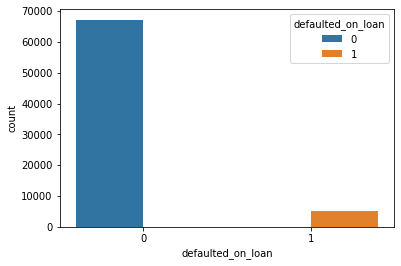

In [9]:
sns.countplot(x='defaulted_on_loan', hue='defaulted_on_loan', data=df)

In [10]:
df['defaulted_on_loan'].value_counts()

0    67148
1     5013
Name: defaulted_on_loan, dtype: int64

### So our target value is unequally distributed. If predict with simple ML algortihm our accuracy will be quite high somewhere above 90%, but thats not what we want.

## Data Visualisation

<AxesSubplot:>

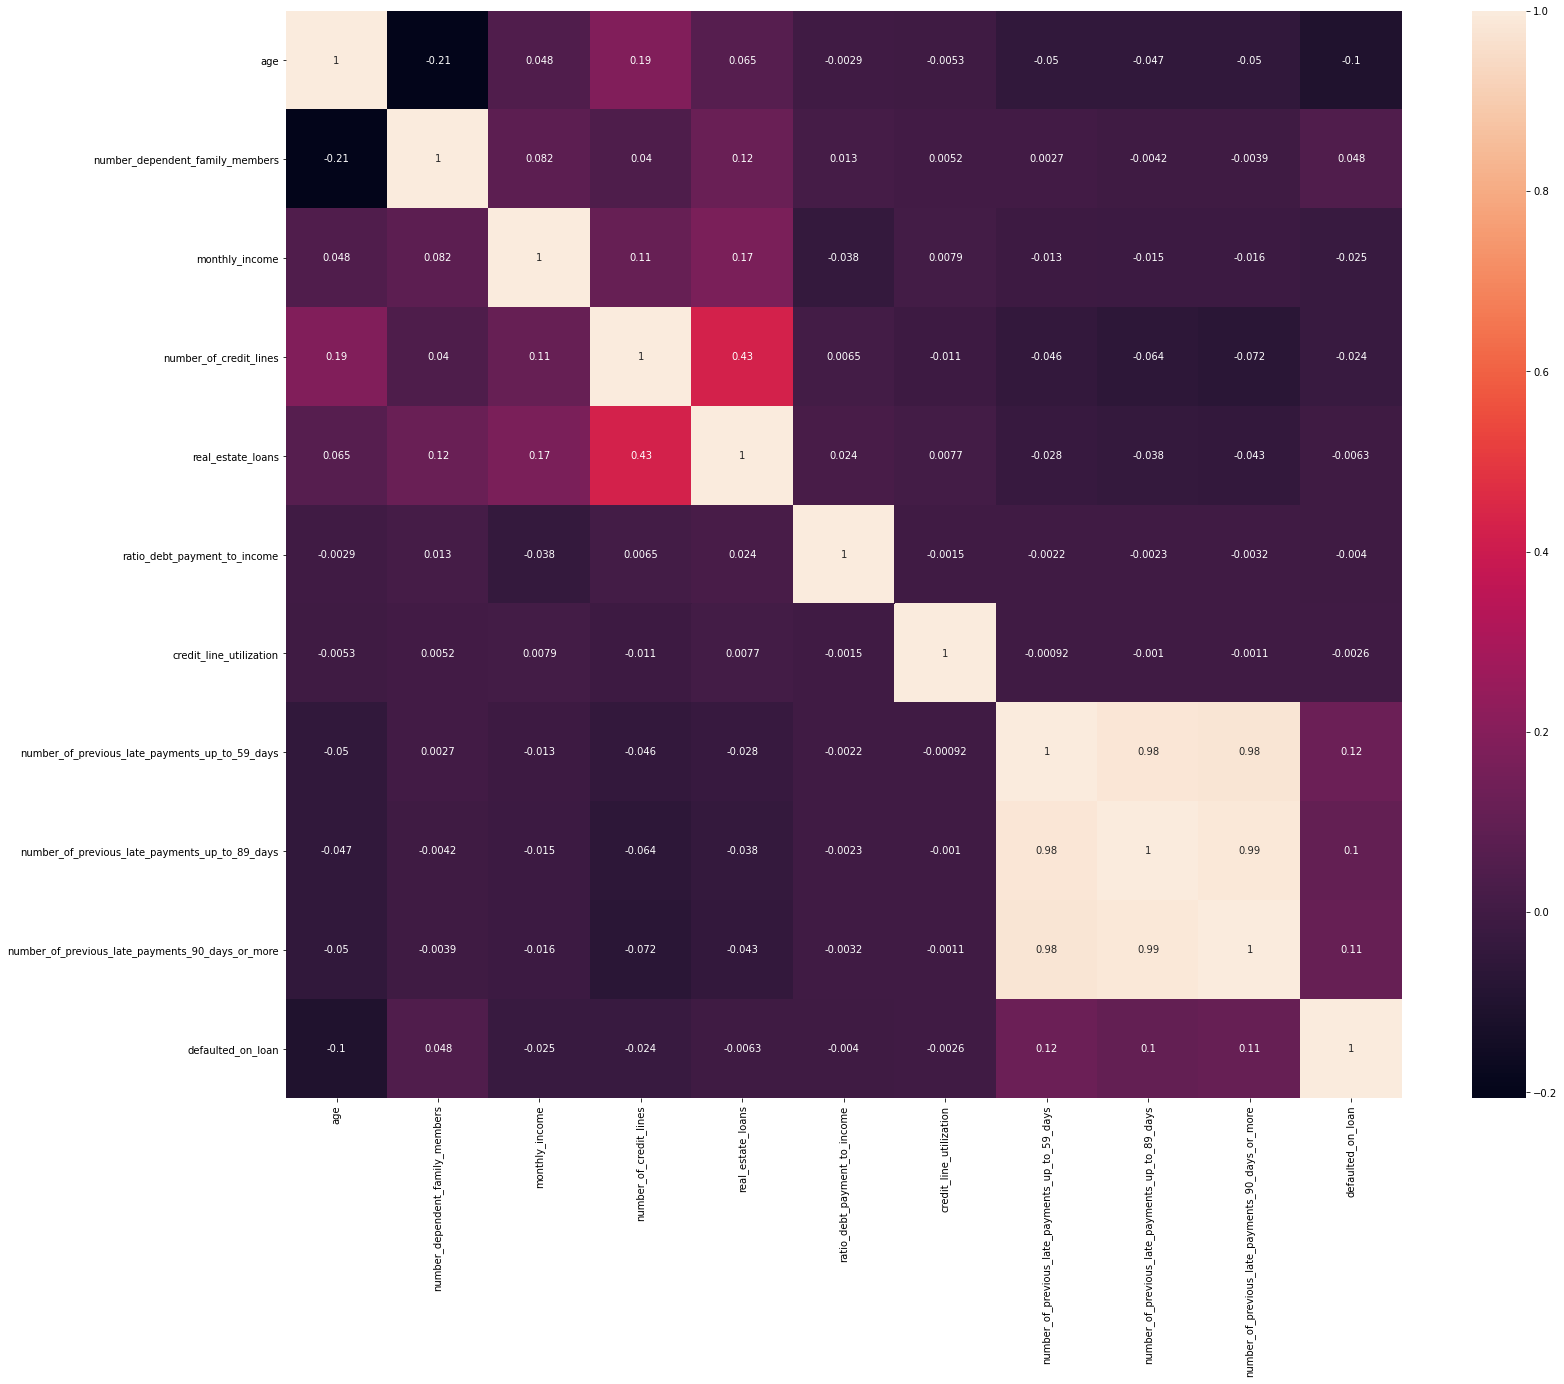

In [8]:
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True)

<AxesSubplot:ylabel='Frequency'>

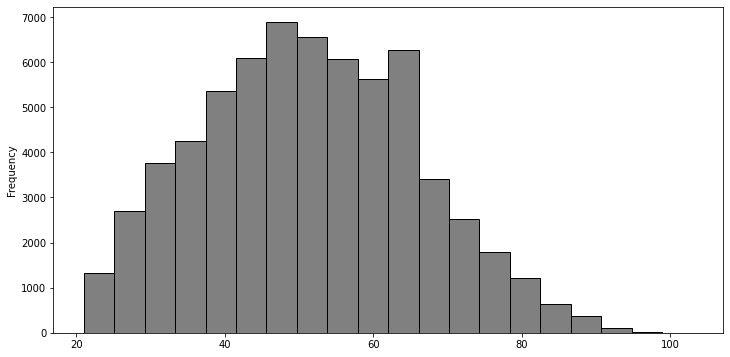

In [22]:
df['age'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

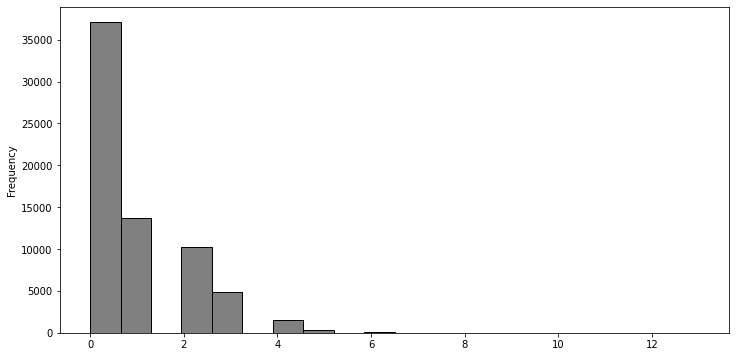

In [23]:
df['number_dependent_family_members'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

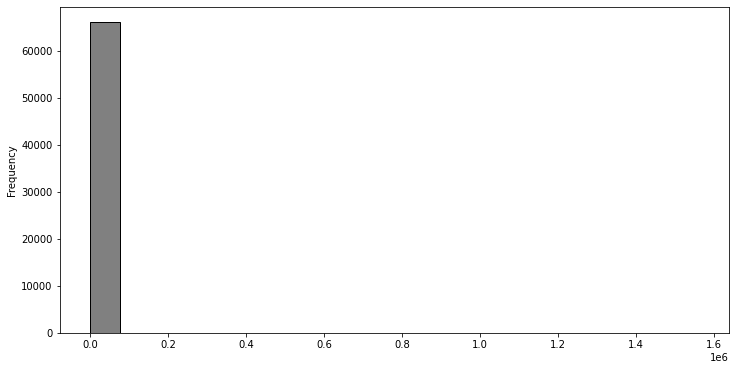

In [24]:
df['monthly_income'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

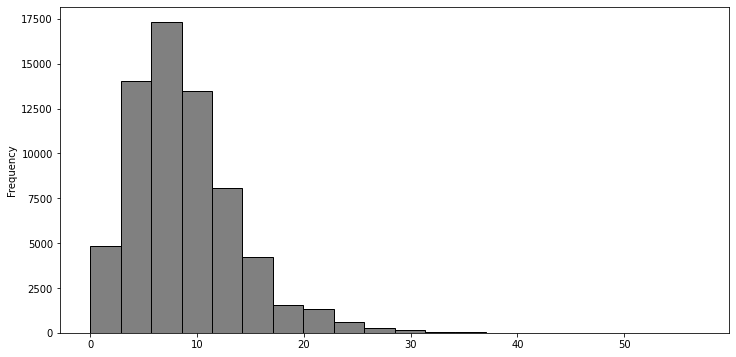

In [25]:
df['number_of_credit_lines'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

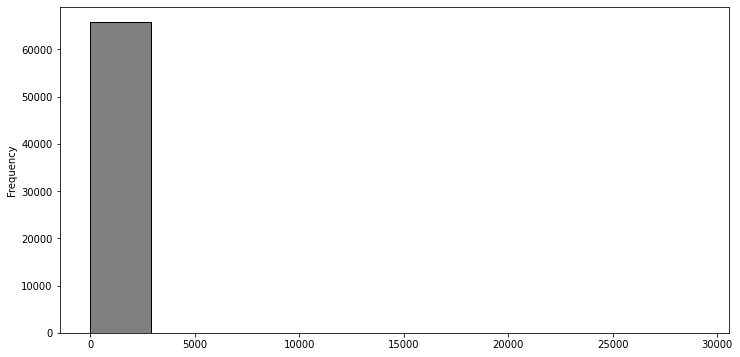

In [26]:
df['credit_line_utilization'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

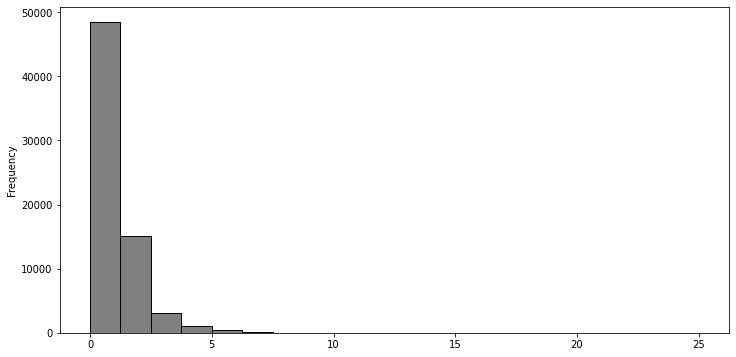

In [27]:
df['real_estate_loans'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

#### Now use boxplots to visualize

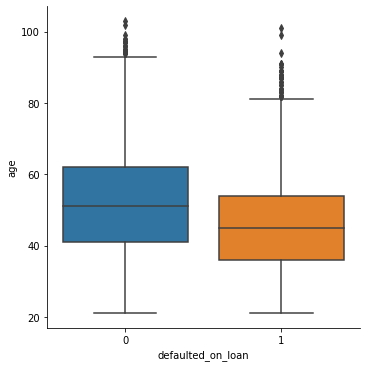

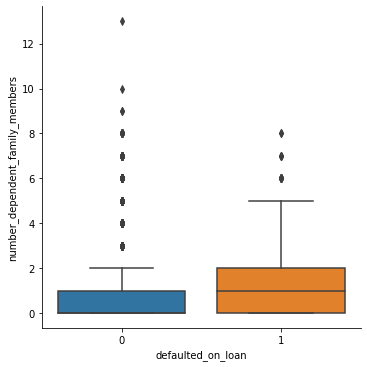

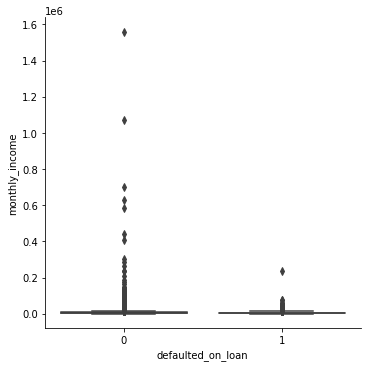

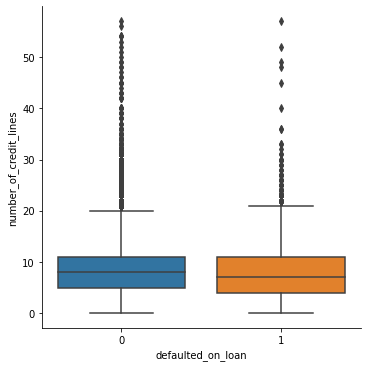

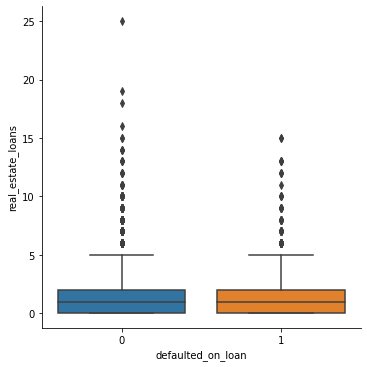

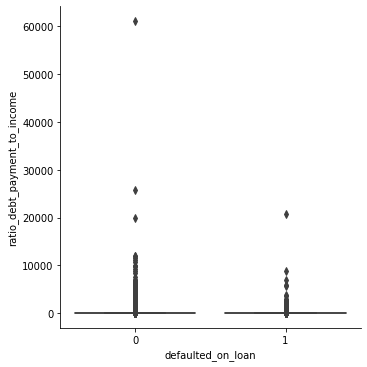

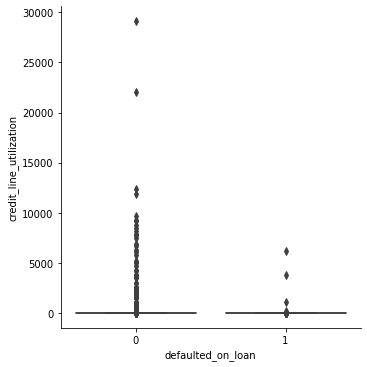

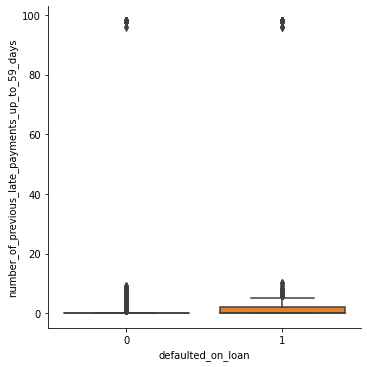

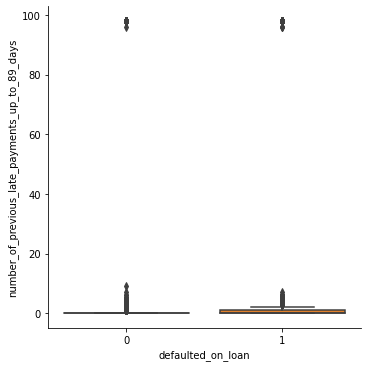

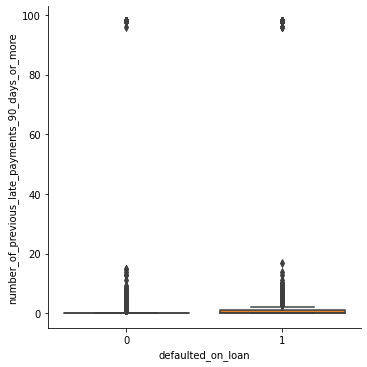

In [28]:
for col in columns:
    sns.catplot(x='defaulted_on_loan', y=col, data=df, kind='box')
    plt.show()

There number of outliers and we will use some outlier removing techniques to get rid of them. But before that we will impute missing values

### Missing value imputation

#### Below we will try different imputing techniques and test them with different ML algorithms

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
X, y = df[columns], df.iloc[:, -1]

#### Imputing with mean

In [18]:
simple_impute = SimpleImputer(strategy='mean')
X_imputed = simple_impute.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = columns
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y)
X_imputed.head(6)

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
0,66.0,0.847009,4000.0,8.756193,1.0,0.569108,0.054888,0.0,0.0,0.0
1,61.0,2.000000,4000.0,6.000000,1.0,0.297176,0.101950,0.0,0.0,0.0
2,31.0,2.000000,3040.0,8.000000,0.0,0.160145,1.227135,4.0,0.0,0.0
3,54.0,4.000000,10218.0,5.000000,0.0,0.067913,0.083278,0.0,0.0,0.0
4,29.0,0.000000,4468.0,6.000000,0.0,0.328261,0.317446,0.0,0.0,0.0
5,39.0,2.000000,4166.0,17.000000,1.0,26.524005,5.225040,1.0,0.0,0.0


In [19]:
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('DTree', DecisionTreeClassifier()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
]

for name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict(X_test)
    print(name)
    print(roc_auc_score(y_test, y_predicted))
    

LogReg
0.5064293162706848
RF
0.5749385759358245
KNN
0.5520558856558826
DTree
0.5964772283300094
GNB
0.5137042490162647
[08:23:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\egadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB
0.5876622651061368


Now we will try imputing with median and from the example below LogisticRegression was the most accurate so we will exclude some other algorithms

In [21]:
simple_impute = SimpleImputer(strategy='median')
X_imputed = simple_impute.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = columns
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y)
X_imputed.head(6)

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
0,66.0,0.0,4000.0,8.0,1.0,0.569108,0.054888,0.0,0.0,0.0
1,61.0,2.0,4000.0,6.0,1.0,0.297176,0.101950,0.0,0.0,0.0
2,31.0,2.0,3040.0,8.0,0.0,0.160145,1.227135,4.0,0.0,0.0
3,54.0,4.0,10218.0,5.0,0.0,0.067913,0.083278,0.0,0.0,0.0
4,29.0,0.0,4468.0,6.0,0.0,0.328261,0.317446,0.0,0.0,0.0
5,39.0,2.0,4166.0,17.0,1.0,0.294673,0.176500,1.0,0.0,0.0


In [22]:
models = [
         ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('DTree', DecisionTreeClassifier()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
]

for name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict(X_test)
    print(name)
    print(roc_auc_score(y_test, y_predicted))

LogReg
0.5045231416010009
RF
0.5751575730611933
KNN
0.5512450167290884
DTree
0.5991714930252007
GNB
0.5088009081642608
[08:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\egadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB
0.5807147968965314


#### We have witnessed that using mean as a imputing strategy type is more useful for our problem

#### Now lets try Iterative Imputer

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)

In [24]:
X_imputed = imp_mean.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = columns
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y)
X_imputed.head(6)

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
0,66.0,0.531495,4000.0,9.435243,1.0,0.569108,0.054888,0.0,0.0,0.0
1,61.0,2.000000,4000.0,6.000000,1.0,0.297176,0.101950,0.0,0.0,0.0
2,31.0,2.000000,3040.0,8.000000,0.0,0.160145,1.227135,4.0,0.0,0.0
3,54.0,4.000000,10218.0,5.000000,0.0,0.067913,0.083278,0.0,0.0,0.0
4,29.0,0.000000,4468.0,6.000000,0.0,0.328261,0.317446,0.0,0.0,0.0
5,39.0,2.000000,4166.0,17.000000,1.0,35.379423,4.686312,1.0,0.0,0.0


In [25]:
models = [
          ('RF', RandomForestClassifier()),
          ('DTree', DecisionTreeClassifier()), 
          ('XGB', XGBClassifier())
]

for name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict(X_test)
    print(name)
    print(roc_auc_score(y_test, y_predicted))

RF
0.573945734102859
DTree
0.6026336358888337
[08:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\egadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB
0.5827468464132588


Iterative imputer performed better than SimpleImputer with median strategy

### Now that we know IterativeImputer is our 'go to' we can start detecting and removing outliers

In [11]:
imp_mean = IterativeImputer(random_state=0)
X_imputed = imp_mean.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = columns
X = X_imputed

### First we will use Isolation Forest technique

We will detect and remove outliers before train test split

In [15]:
iso = IsolationForest(contaminattetion=.1)

In [16]:
yhat = iso.fit_predict(X)
yhat.shape

(72161,)

In [17]:
np.unique(yhat, return_counts=True)

(array([-1,  1]), array([ 7216, 64945], dtype=int64))

IsolationForest totaly detected 7216 outliers out of 72161

X_out and y_out are the ones with no outliers

In [18]:
mask = yhat != -1
X_out, y_out = X[mask], y[mask]

In [19]:
X_out.shape

(64945, 10)

In [20]:
X_out.head()

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
0,66.000000,0.531495,4000.0,9.435243,1.0,0.569108,0.054888,0.0,0.0,0.0
1,61.000000,2.000000,4000.0,6.000000,1.0,0.297176,0.101950,0.0,0.0,0.0
3,54.000000,4.000000,10218.0,5.000000,0.0,0.067913,0.083278,0.0,0.0,0.0
4,29.000000,0.000000,4468.0,6.000000,0.0,0.328261,0.317446,0.0,0.0,0.0
7,51.702857,0.000000,2916.0,5.000000,0.0,0.124100,0.067427,0.0,0.0,0.0


#### Now lets do train test split, train them and compare different outlier detection techniques

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_out, y_out)

In [38]:
models = [
          ('RF', RandomForestClassifier()),
          ('DTree', DecisionTreeClassifier()), 
          ('XGB', XGBClassifier())
]

for name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict(X_test)
    print(name)
    print(roc_auc_score(y_test, y_predicted))

RF
0.5087435518114765
DTree
0.5462800516559032
[09:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\egadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB
0.5114769484299787


The results are not what we expected. Accuracy is lower than what it was before and that's not what we aim for. So we will tyr another techniques

### Now let's use Local Outlier Factor

In [21]:
from sklearn.neighbors import LocalOutlierFactor

In [36]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

In [37]:
np.unique(yhat, return_counts=True)

(array([-1,  1]), array([ 5967, 66194], dtype=int64))

In [39]:
mask = yhat != -1
X_out, y_out = X[mask], y[mask]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_out, y_out)

In [41]:
models = [
          ('RF', RandomForestClassifier()),
          ('DTree', DecisionTreeClassifier()), 
          ('XGB', XGBClassifier())
]

for name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict(X_test)
    print(name)
    print(roc_auc_score(y_test, y_predicted))

RF
0.5607345048586888
DTree
0.5870742564478401
[09:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\egadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB
0.5734586540123364


Predictions from Local Outlier factor is better than IsolationForest

In [12]:
from sklearn.svm import OneClassSVM
from icecream import ic

In [13]:
ee = OneClassSVM(nu=.01)
yhat = ee.fit_predict(X)

In [14]:
np.unique(yhat, return_counts=True)

(array([-1,  1], dtype=int64), array([  726, 71435], dtype=int64))

In [15]:
mask = yhat != -1
X_out, y_out = X[mask], y[mask]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_out, y_out)

In [20]:
models = [
          ('RF', RandomForestClassifier()),
          ('DTree', DecisionTreeClassifier()), 
          ('XGB', XGBClassifier(use_label_encoder=False, objective='binary:logistic' ))
]

for name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict(X_test)
    print(name)
    print(roc_auc_score(y_test, y_predicted))

RF
0.5697835651069603
DTree
0.5943123106897205
[15:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
0.5815764616331167


### From the methods outlier detection methods above One-Class  SVM is our *Winner*

In [16]:
X_new, y_new = X_out, y_out

In [17]:
print(X_new.shape)
print(y_new.shape)

(71435, 10)
(71435,)


## In the following step we gonna try to reduce dimensions

#### UMAP

In [38]:
import umap.umap_ as umap

In [41]:
umap_reducer = umap.UMAP(n_components=2)

#### I have tried running UMAP dimension reduction on local jupyter notebook but it was taking way too long so decided run on kaggle and insert the picture

![title](img/image.png)

For our dataset it was difficult to catch some pattern on UMAP results

In [21]:
y_new.value_counts()

0    66461
1     4974
Name: defaulted_on_loan, dtype: int64

## Our data is unbalanced. There are about 5000 default on loan rows and 66000 not default on load rows. If our model will label all rows as '1' still our model will be more than 90% accurate

### We could try Oversampling, Undersampling or SMOTE(Synthetic Minority Over-sampling Technique). On our case we will try undesampling

In [22]:
# Concatinate imputed and 
data_new = pd.concat([X_new, y_new], axis=1)

In [23]:
number_of_1s = len(data_new[data_new['defaulted_on_loan'] == 1])
ic(number_of_1s)
ones = data_new[data_new['defaulted_on_loan'] == 1]
ones

ic| number_of_1s: 4974


,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
2,31.000000,2.000000,3040.000000,8.000000,0.0,0.160145,1.227135,4.0,0.0,0.0,1
20,48.000000,1.000000,10800.000000,11.000000,3.0,0.590316,0.975767,3.0,0.0,0.0,1
30,42.168606,4.000000,6448.000000,11.000000,0.0,0.190107,0.865913,3.0,1.0,0.0,1
44,45.000000,0.000000,4938.000000,1.000000,0.0,0.068840,1.000000,0.0,1.0,2.0,1
65,44.000000,3.000000,3772.000000,8.000000,1.0,0.537503,0.207312,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
72070,24.000000,1.246024,3418.846084,0.000000,0.0,0.013540,1.000000,1.0,0.0,3.0,1
72086,45.000000,1.000000,10614.829761,8.000000,4.0,0.485349,0.073525,0.0,0.0,0.0,1
72120,51.877978,0.000000,2500.000000,4.000000,0.0,0.552579,0.465445,0.0,1.0,1.0,1
72129,62.000000,0.000000,945.000000,7.814023,0.0,0.707188,3.990244,1.0,0.0,0.0,1


There are 4974 default on loan rows so we will pick the same amount of not default on loan rows

In [24]:
zeros = data_new[data_new['defaulted_on_loan'] == 0]

In [25]:
zeros = zeros.sample(n=4974, replace=False)

Below we will concat equal amount of ones and zeros to the new variable

In [26]:
# data undersampled
df_und = ones.append(zeros)
df_und.reset_index(drop=True)
df_und

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
2,31.000000,2.0,3040.0,8.000000,0.0,0.160145,1.227135,4.0,0.0,0.000000,1
20,48.000000,1.0,10800.0,11.000000,3.0,0.590316,0.975767,3.0,0.0,0.000000,1
30,42.168606,4.0,6448.0,11.000000,0.0,0.190107,0.865913,3.0,1.0,0.000000,1
44,45.000000,0.0,4938.0,1.000000,0.0,0.068840,1.000000,0.0,1.0,2.000000,1
65,44.000000,3.0,3772.0,8.000000,1.0,0.537503,0.207312,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
2540,64.000000,0.0,9922.0,14.000000,2.0,0.232087,0.245236,0.0,0.0,0.000000,0
47571,44.553330,2.0,4579.0,4.000000,0.0,0.040393,0.286943,0.0,0.0,3.000000,0
10,31.000000,1.0,1300.0,5.000000,0.0,0.089162,0.734051,1.0,0.0,0.000000,0
65206,62.000000,0.0,5584.0,11.000000,2.0,0.361504,5.003051,0.0,0.0,-0.032975,0


## Now that our data is balanced we could train our model. We will try K-Fold, GridSearch, Bagging and another interesting techniques

In [52]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,precision_recall_curve, \
roc_auc_score,roc_curve,recall_score,classification_report, f1_score
from sklearn.ensemble import VotingClassifier

In [28]:
X_und = df_und[columns]
y_und = pd.DataFrame(df_und.iloc[:, -1])

In [29]:
X_und = X_und.reset_index(drop=False)
y_und = y_und.reset_index(drop=False)

In [30]:
X_und = X_und.drop(['index'], axis=1)
y_und = y_und.drop(['index'], axis=1)

In [49]:
kf = KFold(5, shuffle=True)

In [55]:
roc = []
recall = []
for train_idx, test_idx in kf.split(X_und):
    X_train, X_test = X_und.iloc[train_idx], X_und.iloc[test_idx]
    y_train, y_test = y_und.iloc[train_idx], y_und.iloc[test_idx]
    
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('scale', StandardScaler())
            ]), columns),
        ])),
        ('classifier', VotingClassifier(estimators=[
            ('tree3', DecisionTreeClassifier(max_depth=3)),
            ('tree9', DecisionTreeClassifier(max_depth=9)),
            ('tree15', DecisionTreeClassifier(max_depth=15)),
            ('tree21', DecisionTreeClassifier(max_depth=21)),
            ('tree35', DecisionTreeClassifier(max_depth=35)),
        ], voting='hard'))
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict(X_test)
    roc.append(roc_auc_score(y_test, y_predicted))
    recall.append(recall_score(y_test, y_predicted))
    
print(np.mean(roc))
print(np.mean(recall))
# print(np.std(accuracies))


C:\Users\egadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\egadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\egadi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

0.7105552820199103
0.6922334363891066


In [44]:
mmm = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_und, y_und)
mmm.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
roc_auc_score(y_test, mmm.predict(X_test))

0.6803770575772392

In [60]:
mmx = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new)
mmx.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
roc_auc_score(y_test, mmx.predict(X_test))

0.591413717225157

In [63]:
roc_auc_score(y_test, mmm.predict(X_test))

0.8098708789874988

In [65]:
roc_auc_score(y_test, pipe.predict(X_test))

0.8060651902088514

Lets upload test.csv and make submission

In [34]:
test = pd.read_csv('test.csv')

In [35]:
test.head()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
0,1,30.0,2.0,2200.0,0.0,0.0,0.000000,0.9999998999999999,NaN,0.0,0.0
1,2,25.0,2.0,1500.0,3.0,0.0,0.269820,NaN,1.0,1.0,3.0
2,3,48.0,2.0,7163.0,12.0,0.0,0.011865,0.065853835,0.0,0.0,0.0
3,4,57.0,0.0,6214.0,6.0,1.0,0.423652,NaN,0.0,0.0,0.0
4,5,41.0,0.0,1438.0,5.0,0.0,0.282835,0.937578027,2.0,0.0,0.0


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48108 entries, 0 to 48107
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                48108 non-null  int64  
 1   age                                               43270 non-null  float64
 2   number_dependent_family_members                   45320 non-null  float64
 3   monthly_income                                    43994 non-null  float64
 4   number_of_credit_lines                            43990 non-null  float64
 5   real_estate_loans                                 45649 non-null  float64
 6   ratio_debt_payment_to_income                      44344 non-null  float64
 7   credit_line_utilization                           43798 non-null  object 
 8   number_of_previous_late_payments_up_to_59_days    45296 non-null  float64
 9   number_of_previou

In [38]:
test['credit_line_utilization'] = test['credit_line_utilization'].str.replace(',', '.').astype(float)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48108 entries, 0 to 48107
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                48108 non-null  int64  
 1   age                                               43270 non-null  float64
 2   number_dependent_family_members                   45320 non-null  float64
 3   monthly_income                                    43994 non-null  float64
 4   number_of_credit_lines                            43990 non-null  float64
 5   real_estate_loans                                 45649 non-null  float64
 6   ratio_debt_payment_to_income                      44344 non-null  float64
 7   credit_line_utilization                           43798 non-null  float64
 8   number_of_previous_late_payments_up_to_59_days    45296 non-null  float64
 9   number_of_previou

In [41]:
columns

Index(['age', 'number_dependent_family_members', 'monthly_income',
       'number_of_credit_lines', 'real_estate_loans',
       'ratio_debt_payment_to_income', 'credit_line_utilization',
       'number_of_previous_late_payments_up_to_59_days',
       'number_of_previous_late_payments_up_to_89_days',
       'number_of_previous_late_payments_90_days_or_more'],
      dtype='object')

In [43]:
imp_mean = IterativeImputer(random_state=0)
X_imputed = imp_mean.fit_transform(test.iloc[:, 1:])
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = columns
test = X_imputed

In [82]:
test_prediction = pipe.predict(test)

In [49]:
test_prediction.shape

(48108,)

In [83]:
submission = pd.DataFrame({'Predicted':test_prediction})

In [88]:
submission

,Id,Predicted
0,1,0
1,2,1
2,3,1
3,4,0
4,5,1
...,...,...
48103,48104,1
48104,48105,1
48105,48106,0
48106,48107,0


In [85]:
submission = submission.set_index(pd.Index(np.arange(1, 48109))).reset_index()

In [87]:
submission = submission.rename(columns={'index': 'Id'})

In [92]:
submission.reset_index(drop=True, inplace=True)

In [94]:
submission.to_csv('submission.csv')

In [50]:
pd.read_csv('sample_submission.csv')

,Id,Predicted
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5
...,...,...
48103,48104,0.5
48104,48105,0.5
48105,48106,0.5
48106,48107,0.5


In [93]:
submission

,Id,Predicted
0,1,0
1,2,1
2,3,1
3,4,0
4,5,1
...,...,...
48103,48104,1
48104,48105,1
48105,48106,0
48106,48107,0
